# Midterm Project: Airbnb Listing Price

## 引言：程序包与数据库导入
利用Kaggle导入数据包从而实现程序自运行

In [1]:
import numpy as np
import pandas as pd
import datetime

from scipy.stats.mstats import winsorize

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
import textwrap

#import toad

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,LassoCV,RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

import warnings
import matplotlib
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False

import zipfile
import os


In [21]:
# 设置中文字体for mac
plt.rcParams['font.family'] = ['Heiti TC']

In [13]:
#若没有安装需要安装
!pip install kaggle

In [15]:
os.environ["KAGGLE_USERNAME"] = "zhudai"
os.environ["KAGGLE_KEY"] = "fdeff7c87bb1263c5d0f830754340c52"

In [16]:
!kaggle datasets download -d mysarahmadbhat/airbnb-listings-reviews


  0%|          | 0.00/101M [00:00<?, ?B/s]
  1%|          | 1.00M/101M [00:00<00:57, 1.82MB/s]
  2%|▏         | 2.00M/101M [00:00<00:29, 3.46MB/s]
  3%|▎         | 3.00M/101M [00:00<00:20, 4.94MB/s]
  6%|▌         | 6.00M/101M [00:00<00:09, 10.5MB/s]
  9%|▉         | 9.00M/101M [00:01<00:06, 15.4MB/s]
 12%|█▏        | 12.0M/101M [00:01<00:05, 18.2MB/s]
 15%|█▍        | 15.0M/101M [00:02<00:13, 6.74MB/s]
 17%|█▋        | 17.0M/101M [00:02<00:11, 7.68MB/s]
 19%|█▉        | 19.0M/101M [00:02<00:11, 7.62MB/s]
 21%|██        | 21.0M/101M [00:02<00:09, 8.46MB/s]
 23%|██▎       | 23.0M/101M [00:03<00:10, 7.68MB/s]
 24%|██▍       | 24.0M/101M [00:03<00:11, 7.28MB/s]
 25%|██▍       | 25.0M/101M [00:03<00:11, 7.02MB/s]
 26%|██▌       | 26.0M/101M [00:03<00:11, 6.77MB/s]
 27%|██▋       | 27.0M/101M [00:03<00:11, 6.62MB/s]
 29%|██▉       | 29.0M/101M [00:03<00:09, 8.21MB/s]
 30%|██▉       | 30.0M/101M [00:04<00:12, 5.73MB/s]
 31%|███       | 31.0M/101M [00:04<00:12, 5.85MB/s]
 33%|███▎      | 33.

## 第一部分：数据预处理
在这一部分里我们将对原数据进行预处理以为后续的分析做准备。
### 一、数据基本信息

In [17]:
# 压缩文件路径
zip_path='airbnb-listings-reviews.zip'

# 读取压缩文件
file=zipfile.ZipFile(zip_path)
# 解压文件
print('开始解压...')
file.extractall()
print('解压结束。')
# 关闭文件流
file.close()

开始解压...
解压结束。


In [3]:
data = pd.read_csv('.\\Airbnb Data\\Listings.csv',
                   encoding='ISO-8859-1',
                   dtype={'host_response_time':object,'district':object})
data.sample(5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
250035,41902890,Charming and elegant apartment in Piazza di Sp...,2435691,2012-05-22,"Rome, Lazio, Italy",within an hour,1.0,1.0,t,19.0,...,3,150,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t
123710,31589174,SuÃÂ­te em apartamento compartilhado com 1 mo...,38167700,2015-07-11,"Porto Alegre, State of Rio Grande do Sul, Brazil",NaN,NaN,NaN,f,1.0,...,7,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
6163,16371112,Cosy & modern studio in heart of trendy Marais,23192738,2014-10-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
128659,43197685,Royal Residence Istanbul - Suit Oda,342136944,2020-03-20,TR,within an hour,0.9,1.0,f,0.0,...,1,1125,100.0,10.0,10.0,10.0,10.0,10.0,8.0,t
50539,1315501,Studio Apartment in Copacabana,7074029,2013-06-23,"Fortaleza, Ceara, Brazil",NaN,NaN,0.0,f,2.0,...,5,1125,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f


In [4]:
data.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

从上面的展示的数据集基本信息可以看到部分变量存在大量空缺值，这使得我们需要在建模前对数据进行清洗。

### 二、数据清洗

In [6]:
# 检测重复值
if data[data.duplicated()].empty:
    print("没有重复值")
else:
    print('重复值如下所示')
    data_duplicate = data[data.duplicated()]
    display(df_duplicate)
    data.drop_duplicates(inplace = True)
    data.index = range(len(data))
    print('Already handled {} duplicate data.'.format(len(data_duplicate)))

没有重复值


In [7]:
# 检测和处理缺失值
data_missing = pd.DataFrame(data.isna().sum(),columns=['Amount'])
display(data_missing)

,Amount
listing_id,0
name,175
host_id,0
host_since,165
host_location,840
host_response_time,128782
host_response_rate,128782
host_acceptance_rate,113087
host_is_superhost,165
host_total_listings_count,165


我们将不同的变量进行分类处理。</br>
"Name" 是一个难以分析的文本数据，我们将单纯的通过"Unnamed"来填充空缺值。</br>
"Host_since","host_is_superhost","host_total_listings_count","host_has_profile_pic","host_identity_verified"这些变量具有的空缺值数量是一致的，这暗示了他们很有可能来自相同的样本，这有可能是由于这些用户在构建数据集时已经从平台注销，我们将删除在这些变量里都存在空缺值的样本。（165个样本在总样本中占比仅为万分之六）。</br>
如果一座公寓来自同一个城市，那么他们的房东很有可能也来自同一个城市，我们将基于这一原则填充"host_location"。</br>
"District"这个变量的空缺值过多，同时"city"和"neighborhood"已经能为我们提供相似的位置信息，因此我们将直接删除这一列。

In [8]:
#对部分缺失值的列填充或者删去
data['name'].fillna('Unnamed',inplace=True)

data.dropna(axis=0,how='all',
            subset=['host_since',
                    'host_is_superhost',
                    'host_total_listings_count',
                    'host_has_profile_pic',
                    'host_identity_verified'],
            inplace=True)

data['host_location'] = data.groupby('city')['host_location'].fillna(method='ffill').fillna(method='bfill')

data = data.drop(columns=['district'])

### 三、针对host相关变量的进一步数据清洗
我们将对"host_id"到"host_identity_verified"的变量进行进一步清洗。
对于时间数据，我们将其转换为注册至今的天数使其能在回归中得到应用。

In [9]:
#计算运营时间
latest_time = pd.to_datetime('2021/08/15') #2021/08/15为原数据集最新编辑的时间，我们将其作为截止日期
delta_time = latest_time-pd.to_datetime(data['host_since'])
delta_time = delta_time.astype('str').apply(lambda x:x[:-5]).astype('int32')
data.insert(loc=4,column='host_duration',value=delta_time)

对于二元的文本变量，我们将其转换为哑变量便于后续分析。

In [10]:
#将['host_is_superhost']等列的分类变量转换为哑变量
data['host_is_superhost'] = pd.get_dummies(data['host_is_superhost'],
                                           drop_first=True)
data['host_has_profile_pic'] = pd.get_dummies(data['host_has_profile_pic'],
                                           drop_first=True)
data['host_identity_verified'] = pd.get_dummies(data['host_identity_verified'],
                                           drop_first=True)

在清洗前，我们先对变量之间的关系和变量本身数值的分布进行了分析，从而确定我们后续使用的方法。

In [11]:
#筛选出包含缺失值和无缺失值的行以对变量进行分析
data_known1 = data.dropna(axis=0,
                          how='any',
                          subset=['host_response_time',
                                  'host_response_rate',
                                  'host_acceptance_rate'])
data_miss1 = data.drop(axis=0,
                       index=data_known1.index)

In [12]:
#对分类变量 host_response_time 进行标签编码
encoder = LabelEncoder()
data_known1_labeled = data_known1.copy()
data_known1_labeled['host_response_time'] = encoder.fit_transform(data_known1['host_response_time'])

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

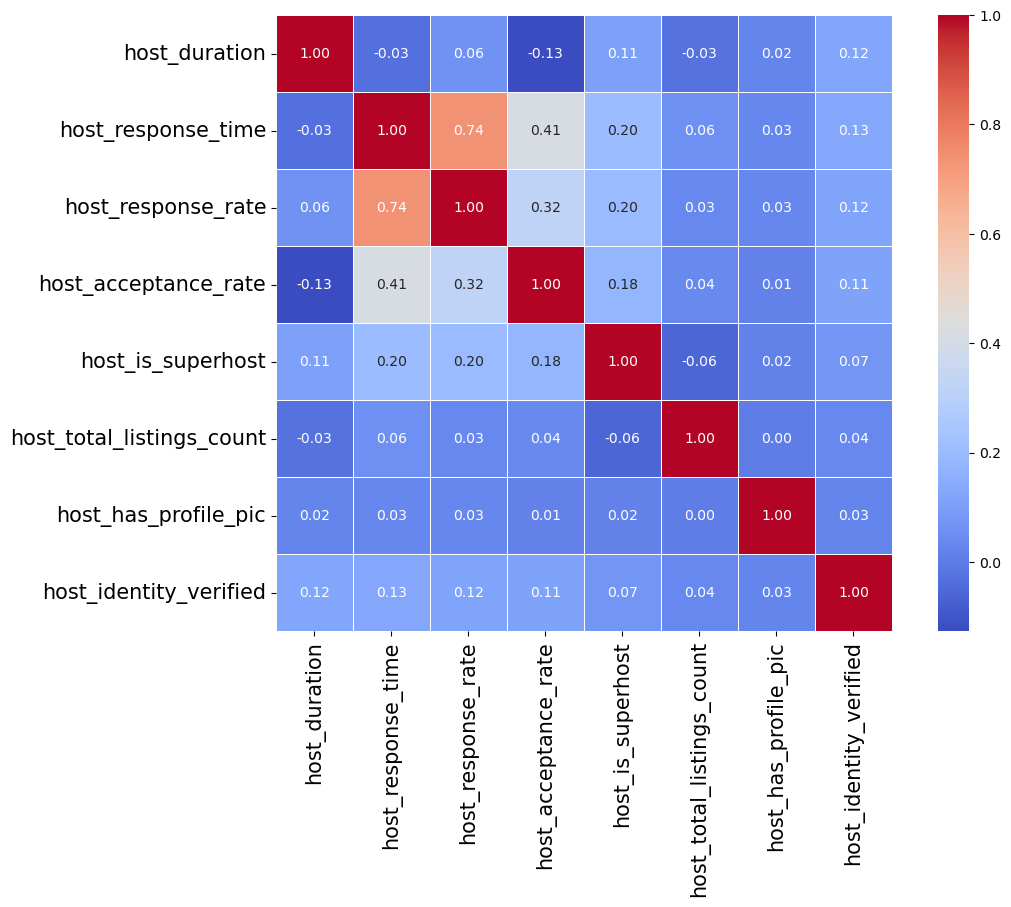

In [22]:
#创建相关系数热力图
host_label = ['host_duration','host_response_time','host_response_rate',
              'host_acceptance_rate','host_is_superhost','host_total_listings_count',
              'host_has_profile_pic','host_identity_verified']
host_corr = data_known1_labeled[host_label].corr()
plt.figure(figsize=(12,8))
sns.heatmap(host_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, square=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [14]:
data_known1.groupby(['host_response_time']).count()

,listing_id,name,host_id,host_since,host_duration,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
host_response_time,,,,,,,,,,,,,,,,,,,,,
a few days or more,9856,9856,9856,9856,9856,9856,9856,9856,9856,9856,...,9856,9856,6092,6091,6091,6090,6091,6091,6091,9856
within a day,19212,19212,19212,19212,19212,19212,19212,19212,19212,19212,...,19212,19212,13887,13882,13883,13878,13880,13877,13875,19212
within a few hours,26115,26115,26115,26115,26115,26115,26115,26115,26115,26115,...,26115,26115,19713,19692,19693,19690,19691,19687,19687,26115
within an hour,79829,79829,79829,79829,79829,79829,79829,79829,79829,79829,...,79829,79829,63743,63603,63606,63598,63603,63600,63599,79829


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

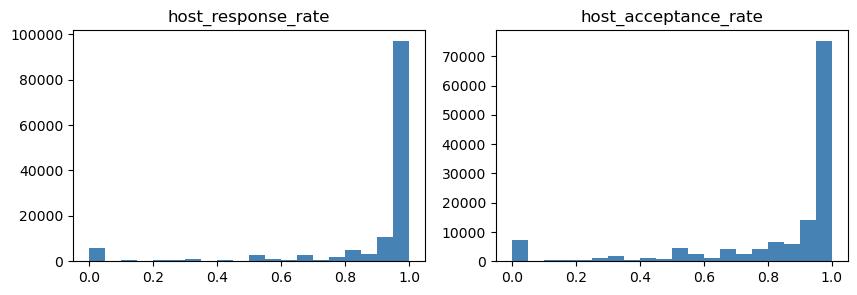

In [15]:
#创建直方图展示['host_response_rate','host_acceptance_rate']的分布情况
host_for_hist = ['host_response_rate','host_acceptance_rate']

fig,ax = plt.subplots(1,2,figsize=(10,3))

for i in range(2):
    ax[i].hist(x=data_known1[host_for_hist[i]],
               bins=20,
               color='steelblue')
    ax[i].set_title(host_for_hist[i])
plt.show()

根据上述分析可知，"host_response_time","host_response_rate","host_acceptance_rate"三个变量本身和其他host类数据相关性较弱，同时数据本身呈现明显的左偏形态，因此我们采取众数填充来保留他们的分布形态。

In [16]:
data['host_response_time'].fillna('within an hour',inplace=True)
data['host_response_rate'].fillna(data_known1['host_response_rate'].mode()[0],inplace=True)
data['host_acceptance_rate'].fillna(data_known1['host_acceptance_rate'].mode()[0],inplace=True)

### 四、针对listing相关变量的进一步数据清洗
我们将对"neighbourhood"到"price(dollar)"的变量进行进一步清洗。

In [17]:
#输出总的城市类别
city = data['city'].unique()
print(city)

['Paris' 'New York' 'Bangkok' 'Rio de Janeiro' 'Sydney' 'Istanbul' 'Rome'
 'Hong Kong' 'Mexico City' 'Cape Town']


由于数据集中的"price"均采用当地货币，我们将其全部转换为美元以便于后续分析。</br>
注：我们采用的是2021年8月15日的汇率数据，这是原数据集最新编辑的时间，我们将其假定为数据爬取的时间。

In [18]:
#汇率数据来源于winds金融终端
rate = [1.179100,1.000000,0.030003,0.190600,0.736900,
        0.117314,1.179100,0.128488,0.050355,0.067932]

exchange_rate = pd.DataFrame({'city':city,
                              'exchange_to_dollar':rate})
display(exchange_rate)

,city,exchange_to_dollar
0,Paris,1.179100
1,New York,1.000000
2,Bangkok,0.030003
3,Rio de Janeiro,0.190600
4,Sydney,0.736900
5,Istanbul,0.117314
6,Rome,1.179100
7,Hong Kong,0.128488
8,Mexico City,0.050355
9,Cape Town,0.067932


In [19]:
#将当地货币转换为美元
data = pd.merge(data,exchange_rate,how='outer',on='city')
data['price(dollar)'] = data['price']*data['exchange_to_dollar']
data = data.drop(columns=['price','exchange_to_dollar'])

在清洗前，我们先对变量之间的关系和变量本身数值的分布进行了分析，从而确定我们后续使用的方法。

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'accommodates'),
  Text(0, 1.5, 'bedrooms'),
  Text(0, 2.5, 'price(dollar)'),
  Text(0, 3.5, 'minimum_nights'),
  Text(0, 4.5, 'maximum_nights')])

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

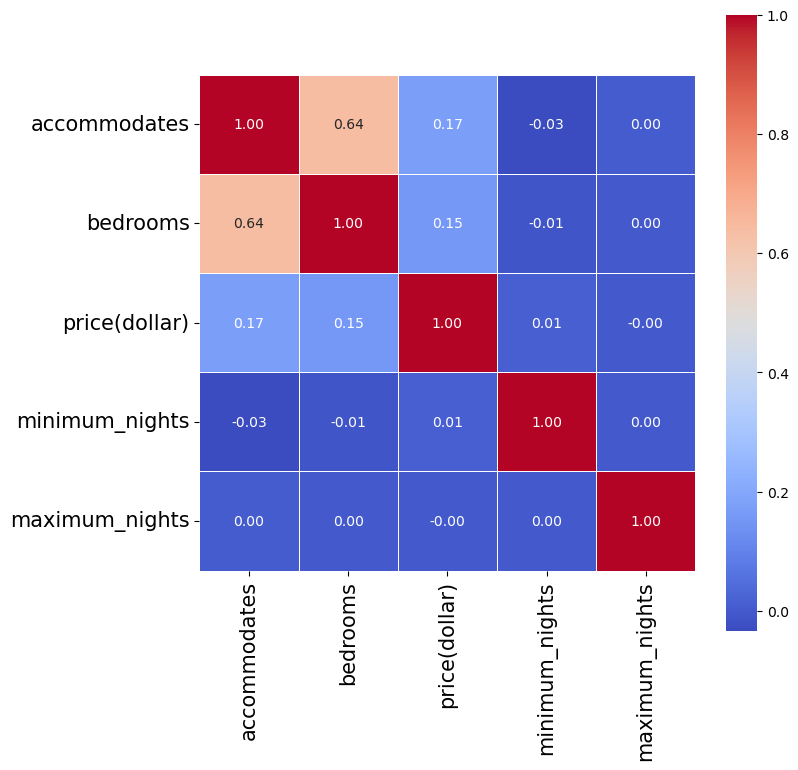

In [20]:
#作出['accommodates','bedrooms','price(dollar)','minimum_nights','maximum_nights']的相关热力图
listing_label = ['accommodates','bedrooms','price(dollar)','minimum_nights','maximum_nights']
listing_corr = data[listing_label].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(listing_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, square=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

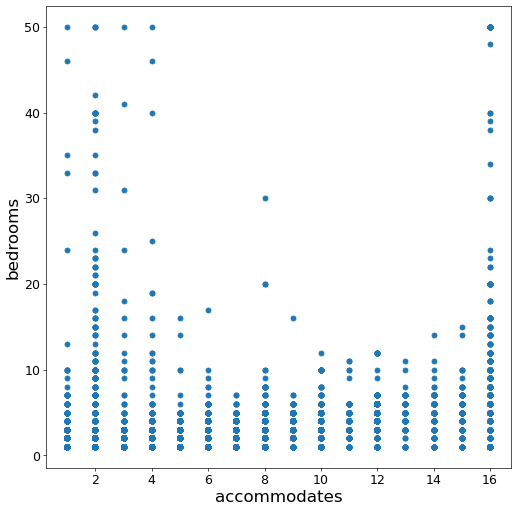

In [23]:
#可视化 accommodates 列与 bedrooms 列之间的关系
x = data['accommodates']
y = data['bedrooms']

plt.figure(figsize=(10,10),dpi=60)
plt.scatter(x,y)
plt.xlabel('accommodates',fontsize=20)
plt.ylabel('bedrooms',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

根据上述分析可知，"bedrooms"和"accommodates"存在较强的相关性，因此我们采用根据"accomodates"分组得到的子数据中"bedrooms"的中位数对该子数据集的空缺值进行填充。

In [25]:
#根据 accommodates 列的中位数值来填充数据框中的 bedrooms 列中的 NaN 值
bedrooms_median = data.groupby('accommodates')['bedrooms'].median()
bedrooms_median[0] = 1
for i in range(len(data)):
    if np.isnan(data.loc[i,'bedrooms']):
        index = data.loc[i,'accommodates']
        data.loc[i,'bedrooms'] = bedrooms_median[index]
    else:
        pass

### 五、针对review相关变量的进一步数据清洗
我们将对"review_scores_rating"到"review_scores_value"的变量进行进一步清洗。

In [26]:
review_label = ['review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value']

In [27]:
#提取包含缺失值的列于不包含缺失值的列
data_known2 = data.dropna(axis=0,
                          how='any',
                          subset=review_label)
data_miss2 = data.drop(axis=0,
                       index=data_known2.index)

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

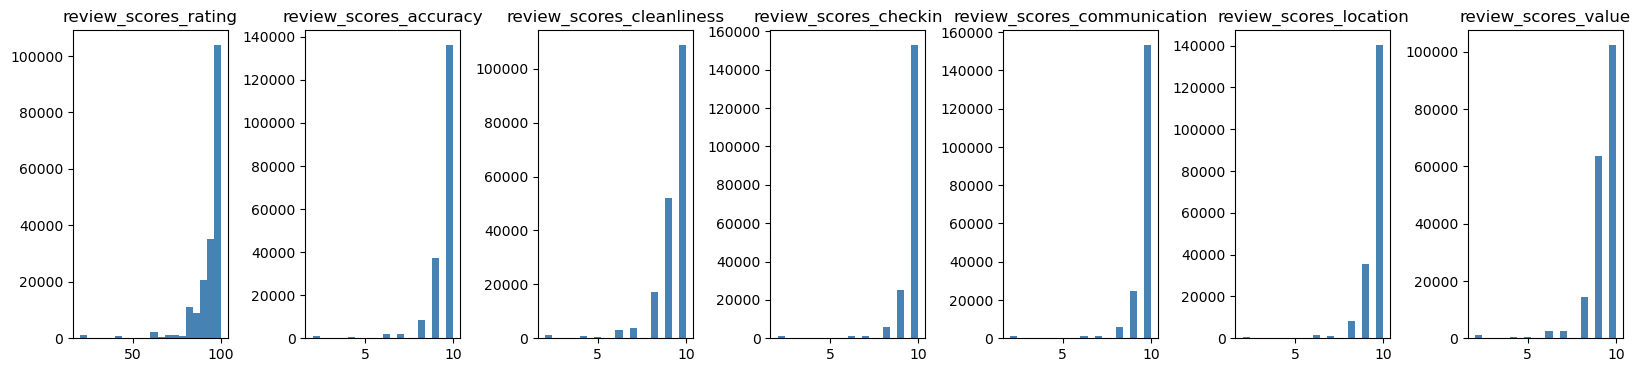

In [28]:
#创建分布直方图
fig,ax = plt.subplots(1,7,figsize=(20,4))
fig.subplots_adjust(wspace=0.5)
for i in range(7):
        ax[i].hist(x=data_known2[review_label[i]],
                   bins=20,
                   color='steelblue')
        ax[i].set_title(review_label[i])
plt.show()

In [29]:
#用中位数填充缺失值
for col in review_label:
    data[col].fillna(data[col].median(),inplace=True)

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

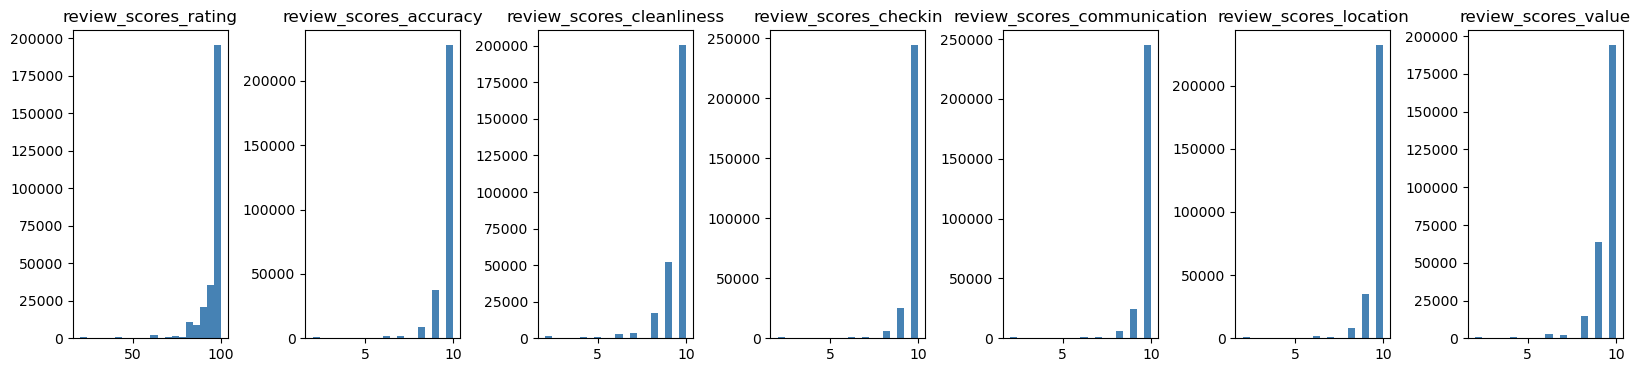

In [30]:
fig,ax = plt.subplots(1,7,figsize=(20,4))
fig.subplots_adjust(wspace=0.5)
for i in range(7):
        ax[i].hist(x=data[review_label[i]],
                   bins=20,
                   color='steelblue')
        ax[i].set_title(review_label[i])
plt.show()

可以看到在填充过后，我们仍然保持了这些变量原有的分布形态。

### 六、离群值处理

In [31]:
data[['minimum_nights','maximum_nights']].describe()

,minimum_nights,maximum_nights
count,279547.000000,2.795470e+05
mean,8.051998,2.757443e+04
std,31.527493,7.285024e+06
min,1.000000,1.000000e+00
25%,1.000000,4.500000e+01
50%,2.000000,1.125000e+03
75%,5.000000,1.125000e+03
max,9999.000000,2.147484e+09


由表可知，数据中的最大值过大，我们认为这是平台录入时或者爬虫时的操作失误造成的，我们采用统计学中的方法对其进行1%的缩尾处理。

In [32]:
#将['minimum_nights','maximum_nights']列的异常值替换为截尾值
outlier_col = ['minimum_nights','maximum_nights']
for col in outlier_col:
    data[col] = winsorize(data[col],limits=[0,0.01])

In [33]:
data[['minimum_nights','maximum_nights']].describe()

,minimum_nights,maximum_nights
count,279547.000000,279547.000000
mean,7.006986,691.047945
std,12.268774,512.936242
min,1.000000,1.000000
25%,1.000000,45.000000
50%,2.000000,1125.000000
75%,5.000000,1125.000000
max,82.000000,1125.000000


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

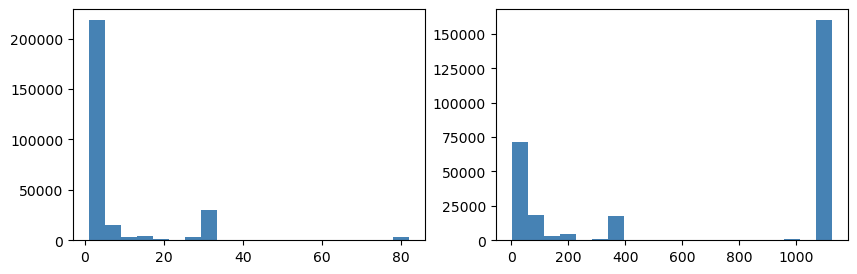

In [34]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
ax[0].hist(x=data['minimum_nights'],bins=20,color='steelblue')
ax[1].hist(x=data['maximum_nights'],bins=20,color='steelblue')
plt.show()

### 六、可视化

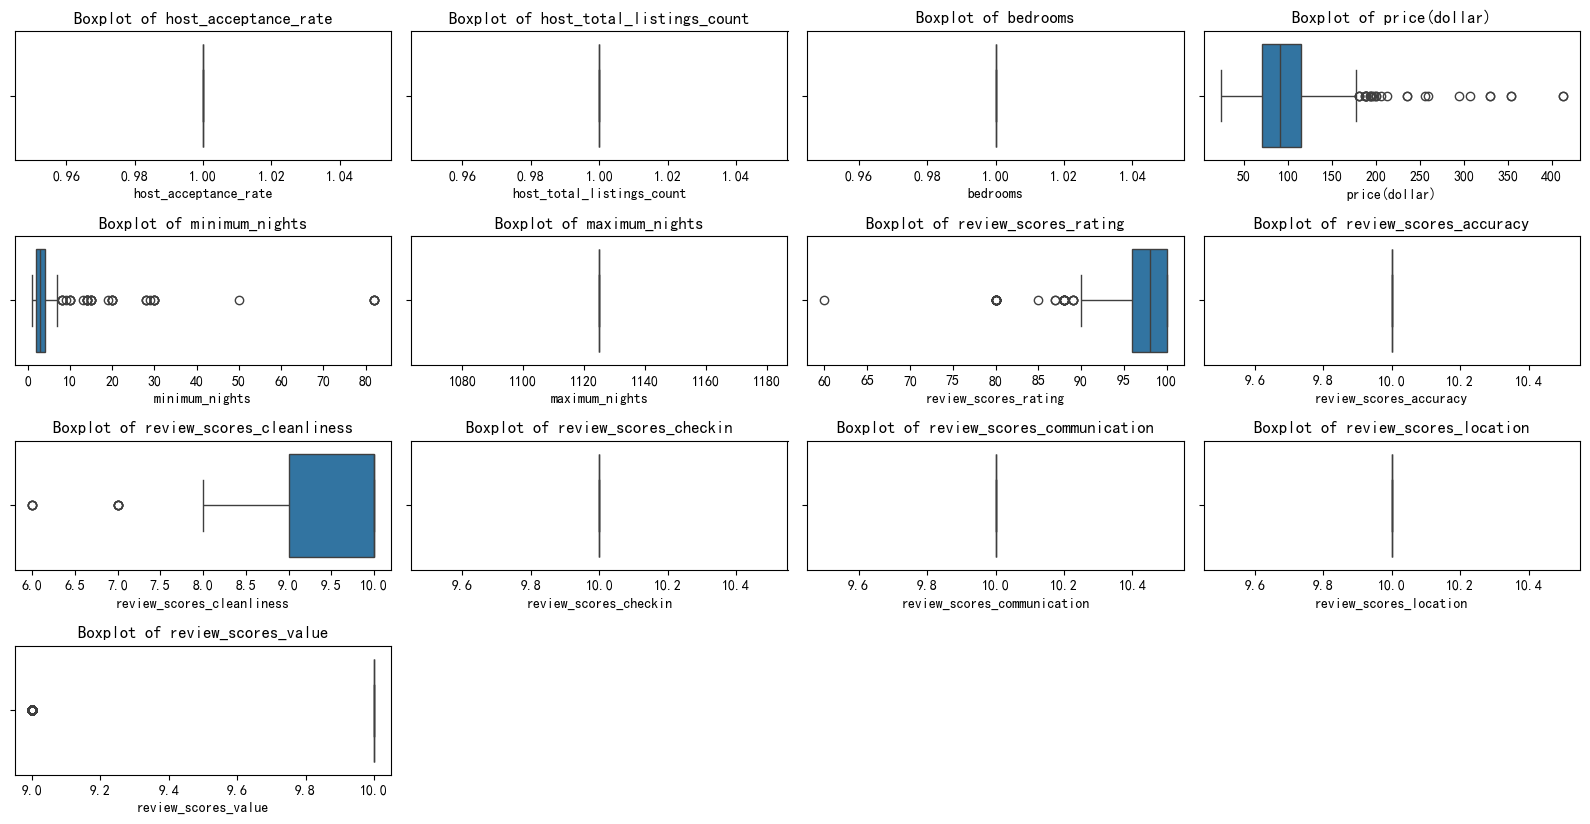

In [35]:
# draw boxplot
columns_to_plot = ['host_acceptance_rate', 'host_total_listings_count', 'bedrooms', 'price(dollar)',
                    'minimum_nights', 'maximum_nights', 'review_scores_rating',
                    'review_scores_accuracy', 'review_scores_cleanliness',
                    'review_scores_checkin', 'review_scores_communication',
                    'review_scores_location', 'review_scores_value']

# define the size of figure
plt.figure(figsize=(16, 10))

# draw boxplots of each variables in a loop
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)  # 创建子图，5 行 4 列
    sns.boxplot(x=data[column].head(1000))
    plt.title(f'Boxplot of {column}')

# adjust the arrangement of subplots
plt.tight_layout()
plt.show()

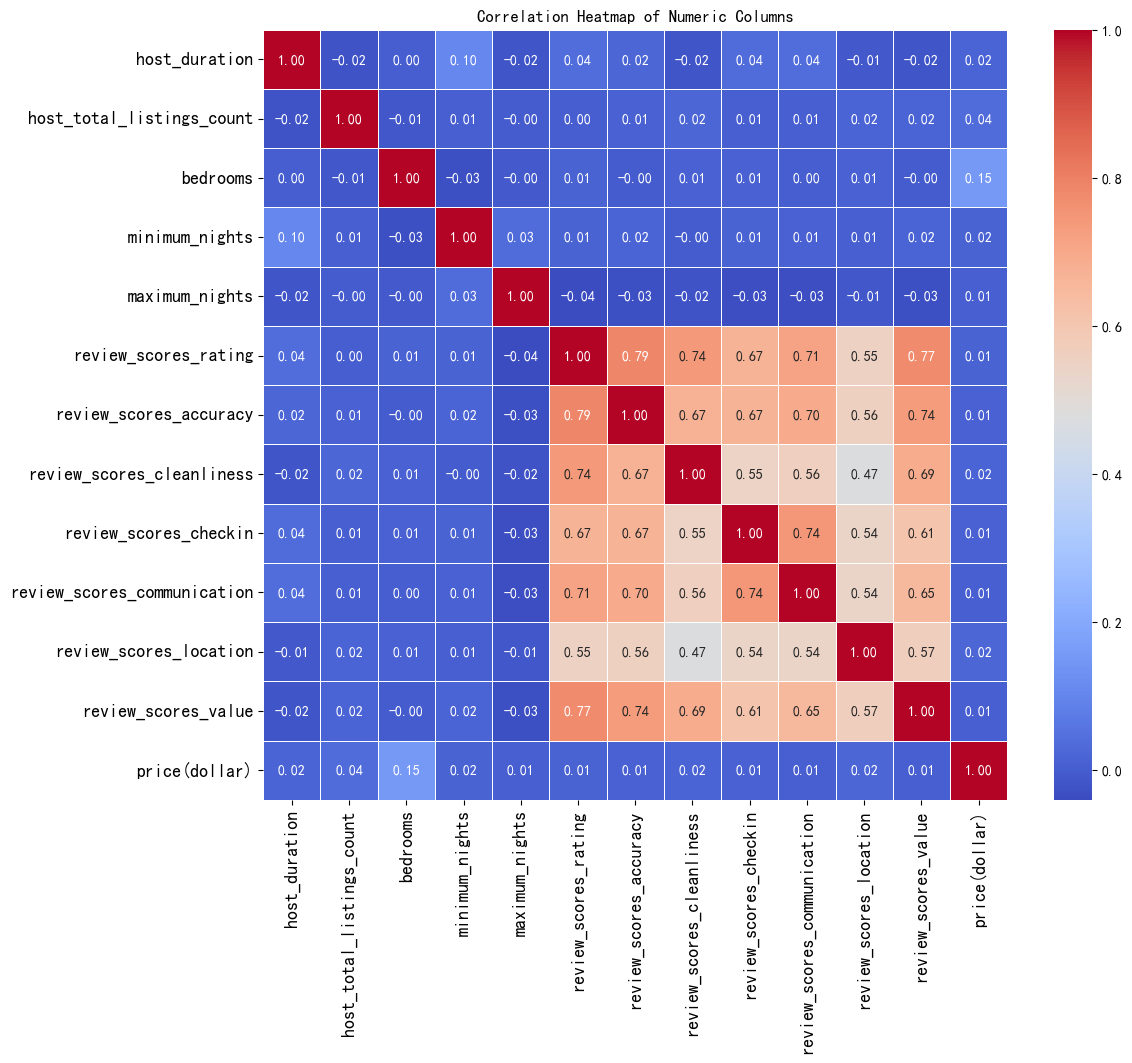

In [36]:
# draw heartmap
# select the numerical variables
numeric_columns = [ 'host_duration','host_total_listings_count', 'bedrooms',
                    'minimum_nights', 'maximum_nights', 'review_scores_rating',
                    'review_scores_accuracy', 'review_scores_cleanliness',
                    'review_scores_checkin', 'review_scores_communication',
                    'review_scores_location', 'review_scores_value','price(dollar)']

# creat a subset including numerical variables
numeric_subset = data[numeric_columns]

# calculate the correlation between cariables
correlation_matrix = numeric_subset.corr()

# draw the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

由上图可知，目前已有的特征和目标变量的相关性有限，因此我们将通过特征工程构建新的变量以帮助之后的模型训练提高拟合程度。

## 第二部分：特征工程
在这一部分，我们将在原数据集的基础上构建新的特征。
### 一、基本特征工程
首先我们将尝试将文本特征转换为之后可用的数值特征。

In [35]:
#提取文本特征
text_col = ['listing_id','host_id','host_location','host_response_time',
            'neighbourhood','city','property_type','room_type',
            'amenities','instant_bookable']

for col in text_col:
    num = len(data[col].unique())
    print("The number of unique value in {} is:{}".format(col,num))

The number of unique value in listing_id is:279547
The number of unique value in host_id is:181901
The number of unique value in host_location is:7159
The number of unique value in host_response_time is:4
The number of unique value in neighbourhood is:660
The number of unique value in city is:10
The number of unique value in property_type is:143
The number of unique value in room_type is:4
The number of unique value in amenities is:244872
The number of unique value in instant_bookable is:2


根据上述结果，"listing_id"对于每一个样本都是独特的，因此我们将其作为我们数据集的索引。</br>
对于"host_id","host_location","neighbourhood","property_type"这些变量而言，作为分类变量他们的独特值数量过多，同时他们包含的信息可以被其他变量涵盖，因此我们选择删除这些变量。</br>
对于"host_response_time","city","room_type","instant_bookable"这些变量而言，作为分类变量他们很适合转换为哑变量，因此我们将他们转换为了哑变量。
对于"amentities"，它是一个特殊的变量，后续我们将对它进行进一步深入的处理。

In [36]:
#删除部分列
data_processed = data.copy()

data_processed.set_index('listing_id',drop=True,inplace=True)

col_drop = ['name','host_id','host_since','host_location',
            'neighbourhood','property_type']
#data_processed = data_processed.drop(columns=col_drop)

In [37]:
#将原始变量转换为哑变量
col_dummy = ['host_response_time','city','room_type']

for col in col_dummy:
    dummy = pd.get_dummies(data_processed[col])
    data_processed = data_processed.join(dummy,on='listing_id')
    #data_processed = data_processed.drop(columns=col)
    
#data_processed['instant_bookable'] = pd.get_dummies(data_processed['instant_bookable'])

ValueError: Columns must be same length as key

In [38]:
data_processed['instant_bookable'].head()

listing_id
281420     f
3705183    f
4082273    f
4797344    f
4823489    f
Name: instant_bookable, dtype: object

In [41]:
data_processed[['instant_bookable_t','instant_bookable_f']] = pd.get_dummies(data_processed['instant_bookable'])

### 二、"amenities"专项处理

In [37]:
pd.DataFrame(data_processed['amenities'].sample(5))

,amenities
listing_id,
40612640,"[""Elevator"", ""Kitchen"", ""Washer"", ""Air conditi..."
1925644,"[""Hangers"", ""Paid parking off premises"", ""Firs..."
43892429,"[""Dishes and silverware"", ""Hangers"", ""Carbon m..."
42709622,"[""Air conditioning"", ""Iron"", ""Hair dryer"", ""Ha..."
12230111,"[""Free street parking"", ""Dishes and silverware..."


可以看到"amenities"尽管是string类数据，但其形式近似list类数据，因此我们将其转换为list进行进一步分析。

In [38]:
#将 'amenities' 列中的字符串形式的列表转换为Python列表
amenity = data_processed['amenities']
amenity = amenity.apply(eval)
len(amenity)

279547

当一个公寓提供更多的便携设施时，它的价格也应该更高，因此我们将每所公寓拥有的便携设施的数量作为我们的一项新特征。

In [39]:
#计算amenity中每个列的元素（列表）的长度
amenity_num = pd.DataFrame(amenity.apply(len))
amenity_num.rename(columns={'amenities':'amenity_num'},inplace=True)
data_processed = data_processed.join(amenity_num,on='listing_id')

接着我们试图分析amenity中各项内容被提及的频率次数。

In [40]:
#展平嵌套列表并输出频率最高的前5个元素
def flatten(series):
    return pd.Series([x for _list in series for x in _list])

amenity_count = flatten(amenity).value_counts()
print(amenity_count[:5])

Wifi                       259952
Essentials                 253393
Long term stays allowed    240905
Kitchen                    240774
TV                         212929
dtype: int64


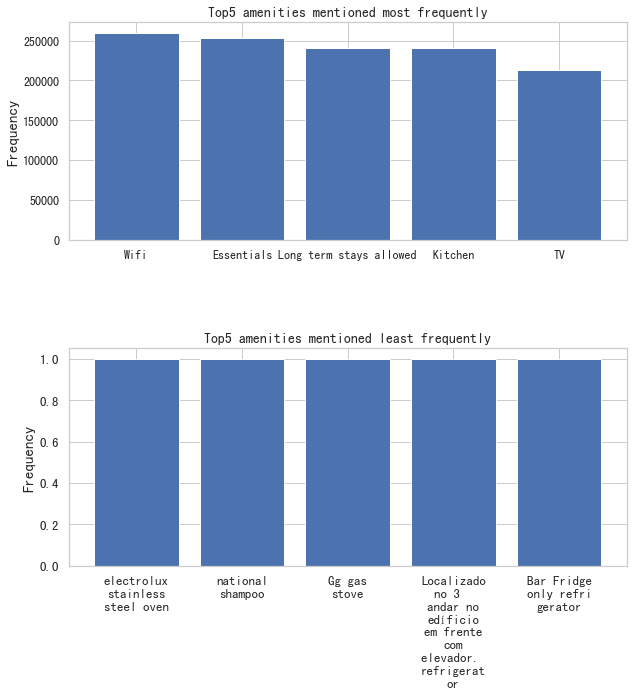

In [132]:
#显示频率最高的前5个和频率最低的前5个 'amenities'
fig,ax = plt.subplots(2,1,figsize = (10,10))

ax[0].bar(amenity_count[:5].index,amenity_count[:5].values)
ax[0].tick_params(labelsize=12)
ax[0].set_ylabel("Frequency", size = 15)
ax[0].set_title("Top5 amenities mentioned most frequently", size = 14)

ax[1].bar(amenity_count[-5:].index,amenity_count[-5:].values)
ax[1].set_xticklabels([textwrap.fill(label, 10) for label in amenity_count[-5:].index])
ax[1].tick_params(labelsize=13)
ax[1].set_ylabel("Frequency", size = 15)
ax[1].set_title("Top5 amenities mentioned least frequently", size = 14)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [42]:
amenity_count.values

array([259952, 253393, 240905, ...,      1,      1,      1])

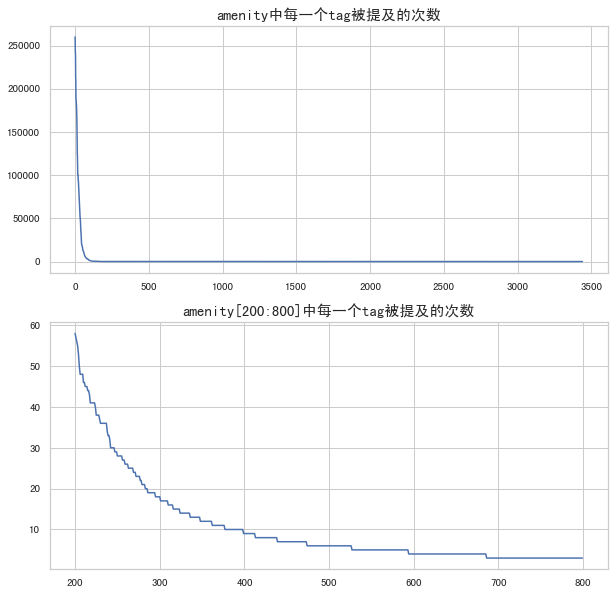

In [140]:
#可视化amenity中每一个tag被提及的次数
fig,ax = plt.subplots(2,1,figsize = (10,10))
ax[0].plot(amenity_count.values)
ax[0].set_title('amenity中每一个tag被提及的次数',fontsize=15)

x = [i for i in range(200,800)]
ax[1].plot(x,amenity_count.values[200:800])
ax[1].set_title('amenity[200:800]中每一个tag被提及的次数',fontsize=15)
plt.show()

可以看到有大量的amenity只被提及了个位数的次数，因此我们根据每项amenity被提及的次数来对变量进行初步筛选。

In [44]:
amenity_top = amenity_count[amenity_count>=30] #30是根据上述的可视化结果通过elbow method确定的

接着我们将他们全部转化成bool类数据以便于后续的降维处理。

In [45]:
def boolean(df, unique_items):
    # Create empty dict
    bool_dict = {}

    # Loop through all the tags
    for i, item in enumerate(unique_items):
        # Apply boolean mask
        bool_dict[item] = df.apply(lambda x: item in x)

    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [46]:
%%time
#将 'amenities' 列中的项目转换为布尔值
amenity_bool = boolean(amenity,amenity_top.keys())
amenity_int = amenity_bool.astype(int)

CPU times: user 20.7 s, sys: 211 ms, total: 20.9 s
Wall time: 20.7 s


In [47]:
print("The shape of matrix id:",amenity_int.shape)

The shape of matrix id: (279547, 247)


### 三、数据降维

由于特征维度过高，我们决定采用PCA方法对其进行降维处理来保留主要的有效的信息，首先我们用过对特征值进行分析来确定PCA中n_components的具体数值。

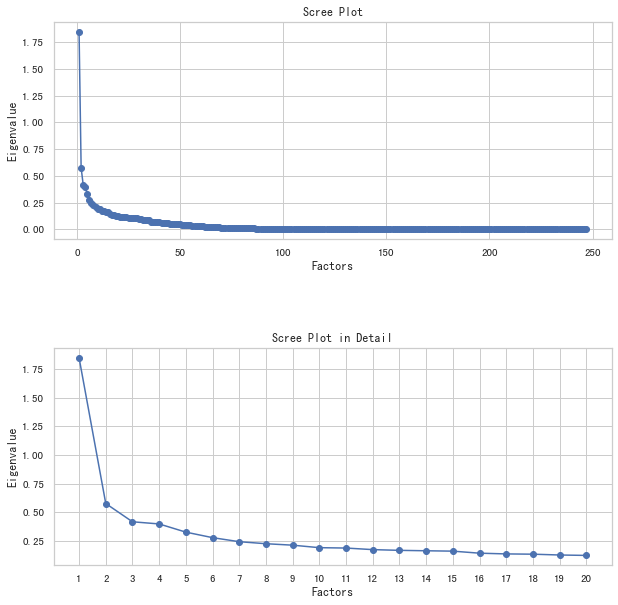

In [157]:
#进行主成分分析（PCA）并绘制特征值的“Scree Plot”
feature_mean = np.mean(amenity_int,axis=0)
sample_num,feature_num = np.shape(amenity_int)
mean_matrix = np.tile(feature_mean,(sample_num,1))
amenity_int_adjust = amenity_int-mean_matrix
cov_matrix = np.cov(amenity_int_adjust.T)

featValue, featVec=  np.linalg.eig(cov_matrix)
featValue = sorted(featValue)[::-1]

fig,ax = plt.subplots(2,1,figsize=(10,10))

ax[0].scatter(range(1, amenity_int.shape[1] + 1), featValue)
ax[0].plot(range(1, amenity_int.shape[1] + 1), featValue)
ax[0].set_title("Scree Plot")  
ax[0].set_xlabel("Factors")
ax[0].set_ylabel("Eigenvalue")
ax[0].grid(True)

ax[1].scatter(range(1,21), featValue[:20])
ax[1].plot(range(1,21), featValue[:20])

x_major_locator=MultipleLocator(1)
ax[1].xaxis.set_major_locator(x_major_locator)

ax[1].set_title("Scree Plot in Detail")  
ax[1].set_xlabel("Factors")
ax[1].set_ylabel("Eigenvalue")
ax[1].grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()

根据elbow method我们将n_components的数值确定为6.

In [49]:
#将原始的数据集 amenity_int 通过PCA降维到一个新的6维度的数据集 amenity_int_6D
pca = PCA(n_components=6)
amenity_int_6D = pca.fit_transform(amenity_int)
amenity_int_6D.shape

(279547, 6)

In [50]:
#将新的特征数据合并到原始数据中，并删除原始数据中不再需要的列
amenity_feature_name = ['amenity1','amenity2',
                        'amenity3','amenity4',
                        'amenity5','amenity6']

amenity_feature = pd.DataFrame(data=amenity_int_6D,
                               index=amenity_int.index,
                              columns=amenity_feature_name)

data_processed = data_processed.join(amenity_feature,on='listing_id')
data_processed = data_processed.drop(columns='amenities')

### 四、利用"longtitude"和"latitude"计算距市中心距离
由于数据集中已经有"city"哑变量的存在，"longtitude"和"latitude"所包含的信息与之重合，我们决定利用它们构建新的特征进行替代。

In [42]:
location = data_processed[['latitude','longitude',
                      'Paris','New York','Bangkok','Rio de Janeiro','Sydney','Istanbul',
                      'Rome','Hong Kong','Mexico City','Cape Town']]
city = city.tolist()
location

,latitude,longitude,Paris,New York,Bangkok,Rio de Janeiro,Sydney,Istanbul,Rome,Hong Kong,Mexico City,Cape Town
listing_id,,,,,,,,,,,,
281420,48.88668,2.33343,True,False,False,False,False,False,False,False,False,False
3705183,48.88617,2.34515,True,False,False,False,False,False,False,False,False,False
4082273,48.88112,2.31712,True,False,False,False,False,False,False,False,False,False
4797344,48.84571,2.30584,True,False,False,False,False,False,False,False,False,False
4823489,48.85500,2.26979,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16079231,-33.93503,18.40655,False,False,False,False,False,False,False,False,False,True
18052019,-34.13698,18.32700,False,False,False,False,False,False,False,False,False,True
18248493,-34.10384,18.47468,False,False,False,False,False,False,False,False,False,True


In [43]:
#动态创建多个DataFrame，每个DataFrame代表不同城市的经纬度数据
for i in range(len(city)):
    exec("city{} = location[location['{}']==1][['latitude','longitude']]".format(i,city[i]))

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

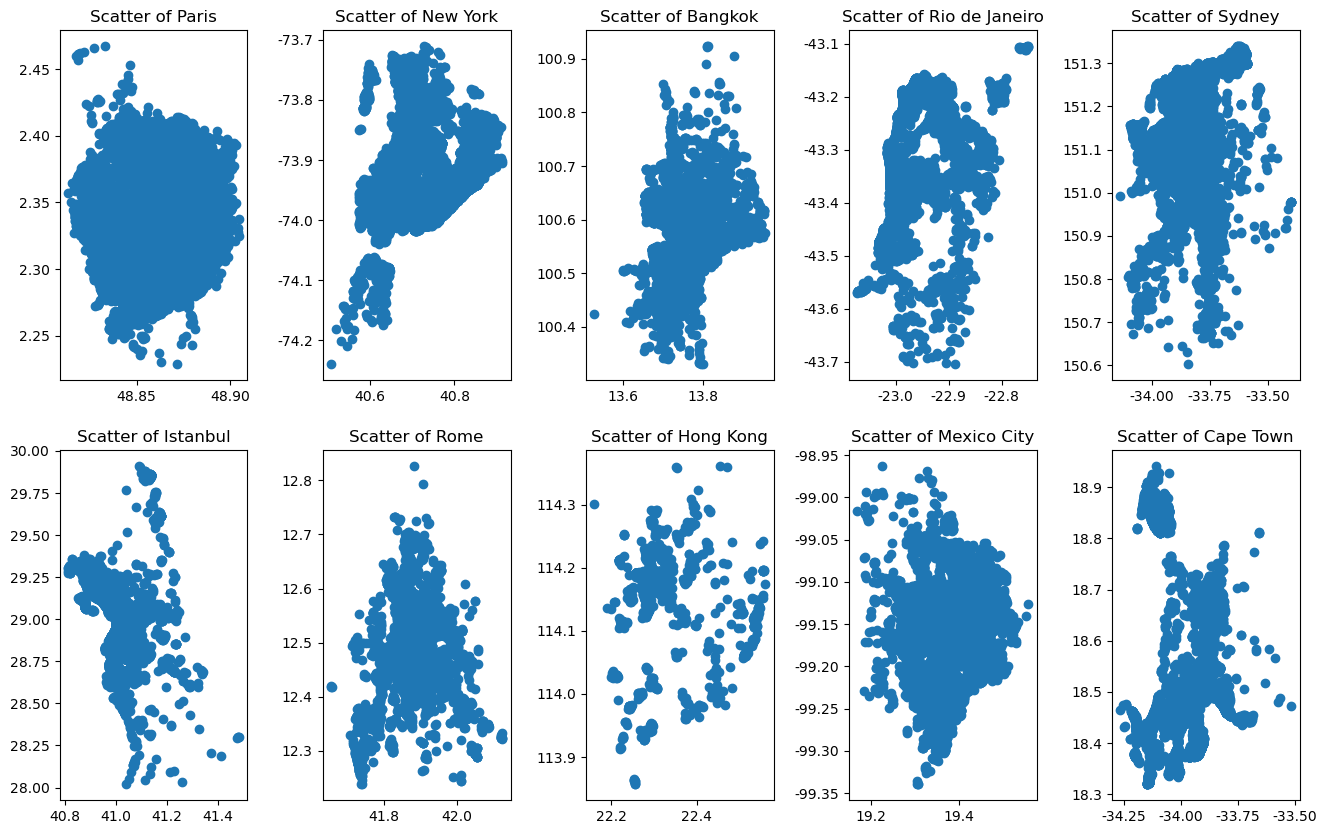

In [44]:
# define the size of figure
plt.figure(figsize=(16, 10))

# draw boxplots of each variables in a loop
for i in range(1,len(city)+1):
    plt.subplot(2,5,i)  # 创建子图
    exec("plt.scatter(city{}['latitude'],city{}['longitude'])".format(i-1,i-1))
    plt.title('Scatter of {}'.format(city[i-1]))
plt.subplots_adjust(wspace=0.4)
plt.show()

由图可知样本是均匀分布在每个城市的，因此我们认为每个城市内样本点坐标的几何平均值可以作为市中心的坐标，并基于此可以计算出样本到城市市中心的距离作为新的特征。

In [45]:
%%time
#计算数据到城市中心的距离，并将这些距离添加到城市数据框中的新列 'distance' 中
def distance(row,center):
    return np.sqrt(np.sum((row - center)**2))

for i in range(len(city)):
    exec("city{} = city{}.abs()".format(i,i))
    exec("city{}_center = np.exp(np.mean(np.log(city{})))".format(i,i))
    exec("city{}['distance'] = city{}.apply(distance,center=city{}_center,axis=1)".format(i,i,i))

CPU times: total: 36.4 s
Wall time: 1min 19s


In [46]:
#对每个城市的距离数据进行最小-最大归一化处理
def minmax(series):
    return (series - series.min()) / (series.max() - series.min())
for i in range(len(city)):
    exec("distance{} = pd.DataFrame(minmax(city{}['distance']))".format(i,i))

distance_list = [distance0,distance1,distance2,distance3,distance4,
                 distance5,distance6,distance7,distance8,distance9]

distance = distance0
for i in range(1,len(city)):
    distance = pd.concat([distance,distance_list[i]],axis=0)
#data_processed = data_processed.join(distance,on='listing_id')
#data_processed = data_processed.drop(columns=['latitude','longitude'])

In [47]:
data_processed = data_processed.join(distance,on='listing_id')

In [48]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279547 entries, 281420 to 33603730
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name                         279547 non-null  object 
 1   host_id                      279547 non-null  int64  
 2   host_since                   279547 non-null  object 
 3   host_duration                279547 non-null  int32  
 4   host_location                279547 non-null  object 
 5   host_response_time           279547 non-null  object 
 6   host_response_rate           279547 non-null  float64
 7   host_acceptance_rate         279547 non-null  float64
 8   host_is_superhost            279547 non-null  bool   
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  bool   
 11  host_identity_verified       279547 non-null  bool   
 12  neighbourhood                279547 non-null  object 
 1

### 五、数据标准化

In [51]:
X = data_processed.drop(columns=['price(dollar)','amenities'])
a = data_processed['amenities']
Y = data_processed['price(dollar)']

In [56]:
X_raw = data_processed.drop(columns=['price(dollar)','amenities'])
a = data_processed['amenities']
Y = data_processed['price(dollar)']

col_dummy = ['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable',
             'a few days or more','within a day','within a few hours','within an hour',
             'Paris','New York','Bangkok','Rio de Janeiro','Sydney','Istanbul',
             'Rome','Hong Kong','Mexico City','Cape Town',
             'Entire place','Hotel room','Private room','Shared room']
X_dummy = data_processed[col_dummy]
X_for_standard = X_raw.drop(columns=col_dummy)

Standard = StandardScaler()
X_Standard = Standard.fit_transform(X_for_standard)

X = pd.DataFrame(data=X_Standard,index=X_for_standard.index,columns=X_for_standard.columns)
X = X.join(X_dummy,on='listing_id')

In [52]:
X = X.join(a,on='listing_id')
X.head()

,name,host_id,host_since,host_duration,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,Rome,Sydney,Entire place,Hotel room,Private room,Shared room,instant_bookable_t,instant_bookable_f,distance,amenities
listing_id,,,,,,,,,,,,,,,,,,,,,
281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,3543,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1.0,...,False,False,True,False,False,False,True,False,0.827539,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long..."
3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,2816,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1.0,...,False,False,True,False,False,False,True,False,0.801189,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""..."
4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,2572,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1.0,...,False,False,True,False,False,False,True,False,0.810585,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",..."
4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,2798,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1.0,...,False,False,True,False,False,False,True,False,0.528713,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter..."
4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,2436,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1.0,...,False,False,True,False,False,False,True,False,0.676304,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha..."


In [53]:
#导出csv便于下一个组员的编写
X.to_csv('X.csv')
Y.to_csv('Y.csv')

### 七、离群值截断处理

In [54]:
#导入数据
df_tmp1=pd.read_csv('X.csv',index_col='listing_id')
df_tmp2=pd.read_csv('Y.csv',index_col='listing_id')
df_tmp=pd.concat([df_tmp2,df_tmp1],axis=1,join='outer')
df_tmp

,price(dollar),name,host_id,host_since,host_duration,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,Rome,Sydney,Entire place,Hotel room,Private room,Shared room,instant_bookable_t,instant_bookable_f,distance,amenities
listing_id,,,,,,,,,,,,,,,,,,,,,
281420,62.492300,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,3543,"Paris, Ile-de-France, France",within an hour,1.0,1.00,False,...,False,False,True,False,False,False,True,False,0.827539,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long..."
3705183,141.492000,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,2816,"Paris, Ile-de-France, France",within an hour,1.0,1.00,False,...,False,False,True,False,False,False,True,False,0.801189,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""..."
4082273,104.939900,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,2572,"Paris, Ile-de-France, France",within an hour,1.0,1.00,False,...,False,False,True,False,False,False,True,False,0.810585,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",..."
4797344,68.387800,Cosy studio (close to Eiffel tower),10668311,2013-12-17,2798,"Paris, Ile-de-France, France",within an hour,1.0,1.00,False,...,False,False,True,False,False,False,True,False,0.528713,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter..."
4823489,70.746000,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,2436,"Paris, Ile-de-France, France",within an hour,1.0,1.00,False,...,False,False,True,False,False,False,True,False,0.676304,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16079231,59.780160,Bright & stylish apartment on trendy Kloof Street,104777926,2016-11-22,1727,"Cape Town, Western Cape, South Africa",a few days or more,0.0,0.00,False,...,False,False,True,False,False,False,True,False,0.663459,"[""Hair dryer"", ""Hot water"", ""Dedicated workspa..."
18052019,50.473476,Long Beach Apartment - Surfers Paradise,123563179,2017-03-31,1598,"Cape Town, Western Cape, South Africa",a few days or more,0.0,0.33,False,...,False,False,True,False,False,False,True,False,0.961824,"[""Hair dryer"", ""Lockbox"", ""Hot water"", ""Dedica..."
18248493,36.887076,Baylife,17245321,2014-06-25,2608,"Cape Town, Western Cape, South Africa",within a day,0.5,1.00,False,...,False,False,True,False,False,False,True,False,0.799421,"[""Hair dryer"", ""Hot water"", ""Heating"", ""Dedica..."


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

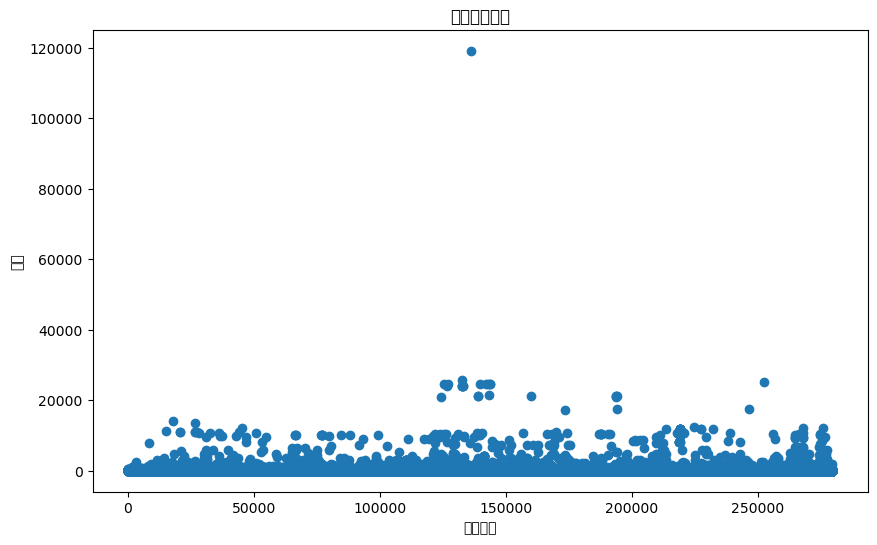

In [55]:
#原始价格数据分布
plt.figure(figsize=(10, 6))
price=df_tmp['price(dollar)']
range_price=np.arange(len(price))
plt.scatter(range_price, price)
plt.xlabel('价格序号')
plt.ylabel('价格')
plt.title('原始价格分布')
plt.show()

我们发现价格数据存在少数过高的离群点，我们筛选掉了这部分数据避免其对我们后续的建模结果造成影响。

In [56]:
#离群值处理
q1 = df_tmp['price(dollar)'].quantile(0.01)
q99 = df_tmp['price(dollar)'].quantile(0.99)
    
# 使用条件筛选，保留在分位数范围内的数据
df_tmp = df_tmp[(df_tmp['price(dollar)'] >= q1) & (df_tmp['price(dollar)'] <= q99)]

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

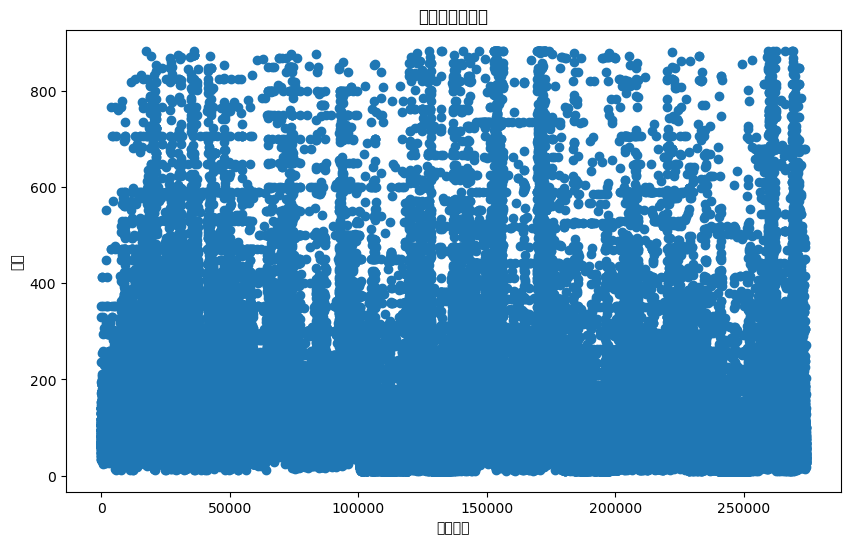

In [57]:
#截断后价格数据分布
plt.figure(figsize=(10, 6))
price1=df_tmp['price(dollar)']
range_price1=np.arange(len(price1))
plt.scatter(range_price1, price1)
plt.xlabel('价格序号')
plt.ylabel('价格')
plt.title('截断后价格分布')
plt.show()

### 八、多重共线性处理

In [58]:
#由于保留全部哑变量时其相关性可能导致多重共线性，多对于n个呀变量只保留n-1个
del df_tmp['a few days or more']
del df_tmp['Hong Kong']
del df_tmp['Entire place']

In [59]:
df_tmp

,price(dollar),name,host_id,host_since,host_duration,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,Rio de Janeiro,Rome,Sydney,Hotel room,Private room,Shared room,instant_bookable_t,instant_bookable_f,distance,amenities
listing_id,,,,,,,,,,,,,,,,,,,,,
281420,62.492300,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,3543,"Paris, Ile-de-France, France",within an hour,1.0,1.00,False,...,False,False,False,False,False,False,True,False,0.827539,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long..."
3705183,141.492000,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,2816,"Paris, Ile-de-France, France",within an hour,1.0,1.00,False,...,False,False,False,False,False,False,True,False,0.801189,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""..."
4082273,104.939900,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,2572,"Paris, Ile-de-France, France",within an hour,1.0,1.00,False,...,False,False,False,False,False,False,True,False,0.810585,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",..."
4797344,68.387800,Cosy studio (close to Eiffel tower),10668311,2013-12-17,2798,"Paris, Ile-de-France, France",within an hour,1.0,1.00,False,...,False,False,False,False,False,False,True,False,0.528713,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter..."
4823489,70.746000,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,2436,"Paris, Ile-de-France, France",within an hour,1.0,1.00,False,...,False,False,False,False,False,False,True,False,0.676304,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16079231,59.780160,Bright & stylish apartment on trendy Kloof Street,104777926,2016-11-22,1727,"Cape Town, Western Cape, South Africa",a few days or more,0.0,0.00,False,...,False,False,False,False,False,False,True,False,0.663459,"[""Hair dryer"", ""Hot water"", ""Dedicated workspa..."
18052019,50.473476,Long Beach Apartment - Surfers Paradise,123563179,2017-03-31,1598,"Cape Town, Western Cape, South Africa",a few days or more,0.0,0.33,False,...,False,False,False,False,False,False,True,False,0.961824,"[""Hair dryer"", ""Lockbox"", ""Hot water"", ""Dedica..."
18248493,36.887076,Baylife,17245321,2014-06-25,2608,"Cape Town, Western Cape, South Africa",within a day,0.5,1.00,False,...,False,False,False,False,False,False,True,False,0.799421,"[""Hair dryer"", ""Hot water"", ""Heating"", ""Dedica..."


In [60]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274034 entries, 281420 to 33603730
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   price(dollar)                274034 non-null  float64
 1   name                         274034 non-null  object 
 2   host_id                      274034 non-null  int64  
 3   host_since                   274034 non-null  object 
 4   host_duration                274034 non-null  int64  
 5   host_location                274034 non-null  object 
 6   host_response_time           274034 non-null  object 
 7   host_response_rate           274034 non-null  float64
 8   host_acceptance_rate         274034 non-null  float64
 9   host_is_superhost            274034 non-null  bool   
 10  host_total_listings_count    274034 non-null  float64
 11  host_has_profile_pic         274034 non-null  bool   
 12  host_identity_verified       274034 non-null  bool   
 1

In [61]:
df_tmp.to_csv('final_exam_data.csv')

### 九、高次项和交互项构建

In [ ]:
##################################################### 
#此部分思路为
# Step 1 : 使用逐步回归初步筛选具有预测作用的一次项(包括连续型变量和哑变量), 记作Var
# Step 2 : 使用相关系数和秩相关系数判断对因变量存在潜在非线性影响的连续型变量,记Var_Nlnr
# Step 3 : 加入Var_Nlnr的二次项 Var_Nlnr**2 用于捕捉非线性
# Step 4 : 加入Var_Nlnr和哑变量的交互项 Var_Nlnr * dummy用于捕捉非线性
# Step 5 : 对加入二次项和交互项之后的变量集{Var, Var_Nlnr ** 2, Var_Nlnr * dummy}再次使用双向逐步回归，筛选最有效的自变量
###################################################


# Step 1 : 使用双向逐步回归筛选预测子
final_data_Stepwise = toad.selection.stepwise(df_tmp,
                                    target = 'price(dollar)',
                                     estimator='lasso', 
                                     direction = 'both', 
                                     criterion = 'aic'
                                     )

In [ ]:
# Step 2 : 使用秩相关系数和相关系数判断对因变量存在潜在非线性影响的连续型变量

# 分别计算皮尔森和斯皮尔曼相关系数，并提取'price(dollar)'列
cor_spearman = final_data_Stepwise.corr(method = 'spearman').iloc[0].reset_index().rename(columns = {'price(dollar)' : 'Spearman'})
cor_pearson= final_data_Stepwise.corr(method = 'pearson').iloc[0].reset_index().rename(columns = {'price(dollar)' : 'Pearson'})

# 计算两类相关系数的差值绝对值，并降序排列，差值越高越可能存在非线性
cor_all = pd.merge(cor_spearman, cor_pearson, on = 'index', how = 'inner')
cor_all['Difference'] = abs(cor_all['Spearman'] - cor_all['Pearson'])
cor_all = cor_all.sort_values(by = 'Difference',ascending= False)
cor_all
# 选取阈值0.01决定是否构建高次项（避免高次项过多，后续逐步回归难以筛选）

# 存在潜在非线性的连续型变量列表
cont_ls = ['accommodates','bedrooms','amenity4','amenity3','minimum_nights','amenity5',
           'amenity1','amenity_num','distance'] # 9

# 存在潜在非线性的类别型变量列表
cat_ls = ['Istanbul','Paris','Mexico City','Bangkok','New York',
          'Sydney','instant_bookable','Cape Town']


In [ ]:
# Step 3 & Step 4: 加入Var_Nlnr的二次项 Var_Nlnr**2, Var_Nlnr和哑变量的交互项 Var_Nlnr * dummy用于捕捉非线性
for cont in cont_ls:
    print(cont)
    final_data_Stepwise[f'{cont}_2'] = final_data_Stepwise[cont] ** 2
    for cat in cat_ls:
        final_data_Stepwise[f'{cont}_{cat}'] = final_data_Stepwise[cont] * final_data_Stepwise[cat]



In [ ]:
# Step 5 : 对加入二次项和交互项之后的变量集{Var, Var_Nlnr ** 2, Var_Nlnr * dummy}再次使用双向逐步回归，筛选最有效的自变量

final_data_nonlinear = toad.selection.stepwise(final_data_Stepwise,
                                    target = 'price(dollar)',
                                     estimator='ols', 
                                     direction = 'both', 
                                     criterion = 'aic'
                                     )


# 非线性数据保存
final_data_nonlinear.to_csv('final_data_nonlinear_1106.csv')

In [184]:
#数据保存
df_tmp.to_csv('final_data.csv')

## 第三部分：模型训练

### 一、导入并合并数据

In [2]:
df_tmp=pd.read_csv('final_data.csv',index_col='listing_id')
df_tmp

,price(dollar),host_duration,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,minimum_nights,maximum_nights,review_scores_rating,...,Rio de Janeiro,Sydney,Istanbul,Rome,Hong Kong,Mexico City,Cape Town,Hotel room,Private room,Shared room
listing_id,,,,,,,,,,,,,,,,,,,,,
281420,62.492300,1.787952,0.330604,0.431322,-0.083022,-0.604055,-0.430301,-0.408109,0.846017,0.688045,...,0,0,0,0,0,0,0,0,0,0
3705183,141.492000,0.971234,0.330604,0.431322,-0.083022,-0.604055,-0.430301,-0.408109,0.846017,0.688045,...,0,0,0,0,0,0,0,0,0,0
4082273,104.939900,0.697123,0.330604,0.431322,-0.083022,-0.604055,-0.430301,-0.408109,0.846017,0.688045,...,0,0,0,0,0,0,0,0,0,0
4797344,68.387800,0.951013,0.330604,0.431322,-0.083022,-0.604055,-0.430301,-0.408109,0.846017,0.688045,...,0,0,0,0,0,0,0,0,0,0
4823489,70.746000,0.544339,0.330604,0.431322,-0.083022,-0.604055,-0.430301,-0.408109,0.846017,0.688045,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16079231,59.779766,-0.252157,-4.236952,-3.755581,-0.083022,-0.135334,-0.430301,-0.408109,-1.171781,0.448590,...,0,0,0,0,0,0,1,0,0,0
18052019,50.473143,-0.397077,-4.236952,-2.373903,-0.083022,0.802107,-0.430301,-0.408109,-1.288755,0.328863,...,0,0,0,0,0,0,1,0,0,0
18248493,36.886833,0.737565,-1.953174,0.431322,-0.083022,-0.604055,-0.430301,6.112522,-0.770171,0.568318,...,0,0,0,0,0,0,1,0,0,0


### 二、拆分训练数据和测试数据

In [3]:
x1=df_tmp.iloc[:,1:]
y1=df_tmp.iloc[:,0]
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=111)

### 三、Linear Regression

In [4]:
LinearRegression1 = LinearRegression()
LinearRegression1.fit(x_train1, y_train1)
y_pred_LR1 = LinearRegression1.predict(x_test1)
mean_absolute_error_LR1 = mean_absolute_error(y_test1, y_pred_LR1)
print("截距：", LinearRegression1.intercept_)
print("系数：", LinearRegression1.coef_)
print('Out-sample MAE:',mean_absolute_error_LR1)

#用回归模型的决定系数（R^2值），也称为拟合优度进行打分
print("LinearRegression训练模型得分:"+str(r2_score(y_train1,LinearRegression1.predict(x_train1))))
print("LinearRegression待测模型得分:"+str(r2_score(y_test1,y_pred_LR1)))

截距： 160.26203865270637
系数： [ 3.28875811e+00  2.57787186e-01  3.99077626e-02  7.84295112e+00
  3.61659608e+01  1.45131695e+01 -1.15849817e+00  3.07376738e-01
  2.60521329e+00 -2.68496083e-01  7.60296184e+00 -1.40792118e+00
 -1.71953758e+00  6.80592427e+00 -5.20826760e+00  1.12477566e+01
 -1.30733277e+01  7.79708822e+00 -8.57277335e+00  9.03001498e+00
  3.94796137e+00  1.64094470e+00 -6.51669071e+00 -3.72935279e+00
 -1.03922138e+01 -6.21815461e+00 -1.20774232e+00  8.55365946e+00
  3.94563053e-01  5.53369867e-01  3.03751446e+00 -1.04116109e+02
 -7.36332647e+01 -1.41299837e+01 -9.41525990e+01 -4.35812843e+01
 -5.68787180e+01 -7.89714857e+01 -3.81582605e+01  3.70718246e+01
 -1.84369349e+01 -3.26204565e+01]
Out-sample MAE: 50.00035516785979
LinearRegression训练模型得分:0.3602133747077192
LinearRegression待测模型得分:0.36282263949720284


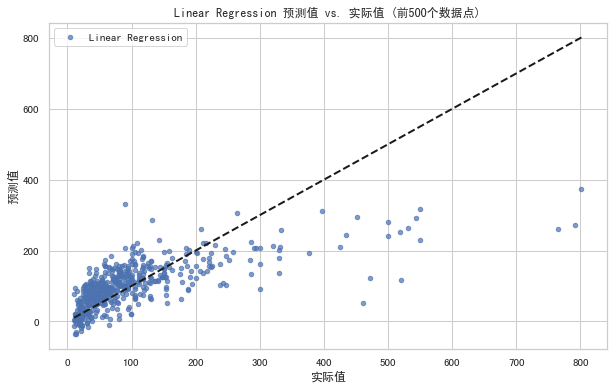

In [37]:

# 选取测试集的前500个数据点
x_test_500 = x_test1[:500]
y_test_500 = y_test1[:500]

# 使用 Linear Regression 模型预测
y_pred_LR_500 = LinearRegression1.predict(x_test_500)

# 绘制预测值和实际值的图
plt.figure(figsize=(10, 6))
plt.scatter(y_test_500, y_pred_LR_500, label='Linear Regression', s=20, alpha=0.7)
plt.plot([min(y_test_500), max(y_test_500)], [min(y_test_500), max(y_test_500)], '--k', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.legend()
plt.title('Linear Regression 预测值 vs. 实际值 (前500个数据点)')
plt.grid(True)
plt.show()

In [38]:
#输出异常值
a=pd.Series(y_pred_LR1,index=y_test1.index)
error=pd.DataFrame()
for i in y_test1.index:
    if np.abs(y_test1[i]-a[i])>600:
        error=error.append({'异常值索引':i,'预测值':a[i],'实际值':y_test1[i]},ignore_index=True)
error


,异常值索引,预测值,实际值
0,43107548.0,235.693117,879.858285
1,43137469.0,103.091226,876.071301
2,11647908.0,122.212015,866.638501
3,22351875.0,53.006604,707.460001
4,34868339.0,71.650254,681.519801
...,...,...,...
80,47754819.0,46.184335,692.562173
81,42215059.0,15.659686,706.686541
82,9857920.0,223.845625,850.000000
83,42468463.0,103.531372,825.370001


### 四、Lasso

In [7]:
lasso1 = Lasso(alpha=0.1)
lasso1.fit(x_train1, y_train1)
y_pred_lasso1 = lasso1.predict(x_test1)
mean_absolute_error_lasso1 = mean_absolute_error(y_test1, y_pred_lasso1)
print("截距：", lasso1.intercept_)
print("系数：", lasso1.coef_)
print('Out-sample MAE:',mean_absolute_error_lasso1)

#用回归模型的决定系数（R^2值），也称为拟合优度进行打分
print("Lasso训练模型得分:"+str(r2_score(y_train1,lasso1.predict(x_train1))))
print("Lasso待测模型得分:"+str(r2_score(y_test1,y_pred_lasso1)))

截距： 142.98065814121722
系数： [  3.37278392   0.31406651   0.           7.67493126  35.9505923
  14.47706274  -0.80652938   0.28508126   2.08794581  -0.
   7.22192639  -1.22778536  -1.53953761   6.66939078  -4.90472368
  10.27850286 -12.08219617   7.80137448  -8.49132867   6.03969781
   4.43067181   1.28758418  -5.2812235   -3.69364018  -0.
  -5.23328144  -1.025258     6.5723033   -0.           0.
   6.68604943 -91.54889406 -62.120078    -6.0879777  -85.03460724
 -35.28330353 -44.37068067 -68.92754971 -27.08410594  33.00150012
 -18.63111099 -27.50483449]
Out-sample MAE: 49.81696222733454
Lasso训练模型得分:0.3592686654315941
Lasso待测模型得分:0.36186116900362664


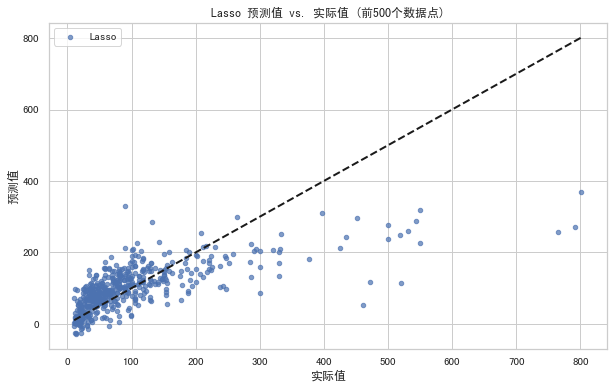

In [39]:
# 选取测试集的前500个数据点
x_test_500 = x_test1[:500]
y_test_500 = y_test1[:500]

# 使用 Lasso 模型预测
y_pred_lasso_500 = lasso1.predict(x_test_500)

# 绘制预测值和实际值的图
plt.figure(figsize=(10, 6))
plt.scatter(y_test_500, y_pred_lasso_500, label='Lasso', s=20, alpha=0.7)
plt.plot([min(y_test_500), max(y_test_500)], [min(y_test_500), max(y_test_500)], '--k', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.legend()
plt.title('Lasso 预测值 vs. 实际值 (前500个数据点)')
plt.grid(True)
plt.show()

### 五、Ridge

In [9]:
ridge1 = Ridge(alpha=0.1)
ridge1.fit(x_train1, y_train1)
y_pred_ridge1 = ridge1.predict(x_test1)
mean_absolute_error_ridge1 = mean_absolute_error(y_test1, y_pred_ridge1)
print("截距：", ridge1.intercept_)
print("系数：", ridge1.coef_)
print('Out-sample MAE:',mean_absolute_error_ridge1)

#用回归模型的决定系数（R^2值），也称为拟合优度进行打分
print("Ridge训练模型得分:"+str(r2_score(y_train1,ridge1.predict(x_train1))))
print("Ridge待测模型得分:"+str(r2_score(y_test1,y_pred_ridge1)))

截距： 160.25888477359342
系数： [ 3.28881999e+00  2.57909593e-01  3.99256209e-02  7.84295354e+00
  3.61658557e+01  1.45131771e+01 -1.15851836e+00  3.07390204e-01
  2.60522987e+00 -2.68467958e-01  7.60289755e+00 -1.40792267e+00
 -1.71954546e+00  6.80597203e+00 -5.20831412e+00  1.12480441e+01
 -1.30735746e+01  7.79694112e+00 -8.57276517e+00  9.02903207e+00
  3.94807313e+00  1.64088708e+00 -6.51633053e+00 -3.72955977e+00
 -1.03908561e+01 -6.21800808e+00 -1.20783821e+00  8.55319815e+00
  3.94012339e-01  5.52953957e-01  3.03927600e+00 -1.04111696e+02
 -7.36295138e+01 -1.41276409e+01 -9.41495108e+01 -4.35786255e+01
 -5.68746514e+01 -7.89681050e+01 -3.81550347e+01  3.70712969e+01
 -1.84372104e+01 -3.26200128e+01]
Out-sample MAE: 50.00028230507605
Ridge训练模型得分:0.36021337463094993
Ridge待测模型得分:0.3628226111049476


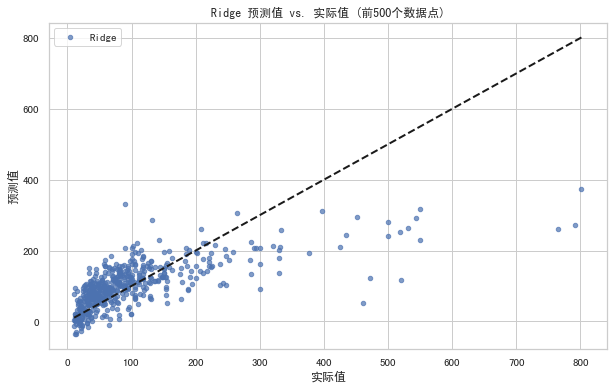

In [40]:
# 选取测试集的前500个数据点
x_test_500 = x_test1[:500]
y_test_500 = y_test1[:500]

# 使用 Ridge 模型预测
y_pred_ridge_500 = ridge1.predict(x_test_500)

# 绘制预测值和实际值的图
plt.figure(figsize=(10, 6))
plt.scatter(y_test_500, y_pred_ridge_500, label='Ridge', s=20, alpha=0.7)
plt.plot([min(y_test_500), max(y_test_500)], [min(y_test_500), max(y_test_500)], '--k', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.legend()
plt.title('Ridge 预测值 vs. 实际值 (前500个数据点)')
plt.grid(True)
plt.show()

### 六、Elastic Net

In [12]:
elastic_net1 = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net1.fit(x_train1, y_train1)
y_pred_elastic1 =elastic_net1.predict(x_test1)
mean_absolute_error_elastic1 = mean_absolute_error(y_test1, y_pred_elastic1)
print("截距：", elastic_net1.intercept_)
print("系数：", elastic_net1.coef_)
print('Out-sample MAE:',mean_absolute_error_elastic1)

#用回归模型的决定系数（R^2值），也称为拟合优度进行打分
print("Elastic Net训练模型得分:"+str(r2_score(y_train1,elastic_net1.predict(x_train1))))
print("Elastic Net待测模型得分:"+str(r2_score(y_test1,y_pred_elastic1)))

截距： 114.86187997939975
系数： [ 5.06164064e+00  9.05569365e-01 -2.00838420e-02  7.71433609e+00
  3.28033490e+01  1.53549669e+01  3.15927873e-01  4.92672696e-01
  2.45346596e+00  0.00000000e+00  5.62336358e+00 -1.09952521e+00
 -1.57978606e+00  7.28020670e+00 -5.14800789e+00  6.71684945e+00
 -7.27131703e+00  7.93614340e+00 -8.99077754e+00 -6.04398656e+00
  7.01164541e+00  2.10857411e+00  6.42678595e-02 -5.63907563e+00
 -0.00000000e+00 -2.10915146e+00 -2.78698191e+00  4.05779461e+00
 -1.44486188e+00 -0.00000000e+00  1.67725947e+01 -2.66258514e+01
 -1.22912732e+01  1.31020627e+01 -3.26111212e+01 -2.46408258e+00
 -3.52664980e+00 -2.05862809e+01  4.10843064e+00  1.12033781e+01
 -1.80237190e+01 -8.47848447e+00]
Out-sample MAE: 50.30412795771997
Elastic Net训练模型得分:0.3309129677653744
Elastic Net待测模型得分:0.3347679674397689


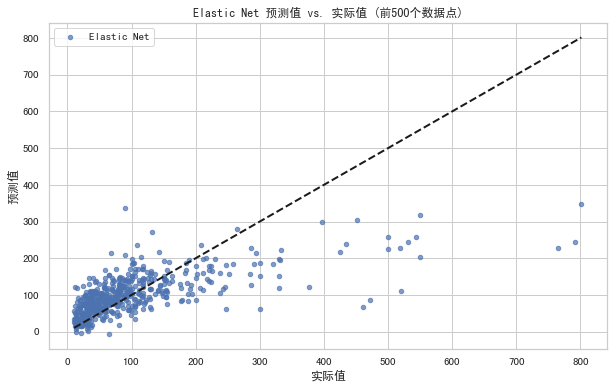

In [41]:
# 选取测试集的前500个数据点
x_test_500 = x_test1[:500]
y_test_500 = y_test1[:500]

# 使用 Elastic Net 模型预测
y_pred_elastic_net_500 = elastic_net1.predict(x_test_500)

# 绘制预测值和实际值的图
plt.figure(figsize=(10, 6))
plt.scatter(y_test_500, y_pred_elastic_net_500, label='Elastic Net', s=20, alpha=0.7)
plt.plot([min(y_test_500), max(y_test_500)], [min(y_test_500), max(y_test_500)], '--k', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.legend()
plt.title('Elastic Net 预测值 vs. 实际值 (前500个数据点)')
plt.grid(True)
plt.show()

### 七、超参取值与测试模型R^2得分

In [14]:
result=pd.DataFrame(columns=["参数","lasso测试模型得分","ridge测试模型得分","elastic_net测试模型得分"])
for i in range(1,100):
    alpha=i/100
    ridge=Ridge(alpha=alpha)
    lasso=Lasso(alpha=alpha)
    elastic_net=ElasticNet(alpha=alpha)
    ridge.fit(x_train1,y_train1)
    lasso.fit(x_train1,y_train1)
    elastic_net.fit(x_train1,y_train1)
    result=result.append([{"参数":alpha,"lasso测试模型得分":r2_score(y_test1,lasso.predict(x_test1)),"ridge测试模型得分":r2_score(y_test1,ridge.predict(x_test1)),"elastic_net测试模型得分":r2_score(y_test1,elastic_net.predict(x_test1))}])
result 

,参数,lasso测试模型得分,ridge测试模型得分,elastic_net测试模型得分
0,0.01,0.362809,0.362823,0.358969
0,0.02,0.362767,0.362823,0.354438
0,0.03,0.362701,0.362823,0.350656
0,0.04,0.362629,0.362823,0.347519
0,0.05,0.362546,0.362823,0.344825
...,...,...,...,...
0,0.95,0.335568,0.362822,0.277356
0,0.96,0.335374,0.362822,0.276906
0,0.97,0.335178,0.362822,0.276458
0,0.98,0.334979,0.362822,0.276015


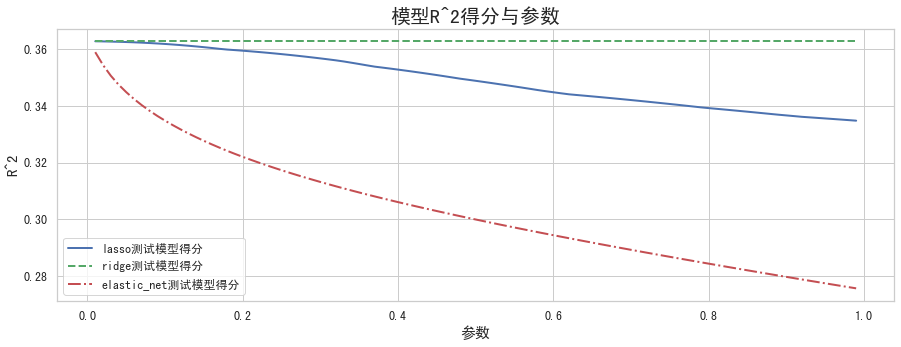

In [15]:
#用图像来展示上述变化趋势

font_dict = {'font.sans-serif': ['SimHei', 'Arial']}
sns.set(style="whitegrid", rc=font_dict)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(result["参数"], result["lasso测试模型得分"], label="lasso测试模型得分", linestyle='-',  color='b',linewidth=2)
ax.plot(result["参数"], result["ridge测试模型得分"], label="ridge测试模型得分", linestyle='--',color='g',linewidth=2)
ax.plot(result["参数"], result["elastic_net测试模型得分"], label="elastic_net测试模型得分", linestyle='-.', color='r',linewidth=2)
plt.title("模型R^2得分与参数", fontsize=20)

ax.set_xlabel("参数", fontsize=15)
ax.set_ylabel("R^2", fontsize=15)
ax.grid(True)
ax.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=12)

plt.show()

## 第四部分:模型评估

### 一、测试超参取值与MAE变化

In [35]:
# 创建不同的正则化参数
alphas = np.logspace(-2, 1, 80,base=10) 


#### （1）Lasso

In [36]:
# Lasso回归下每个 alpha 值的 MAE
lasso_mae_values = []
count=0
for alpha in alphas:
    lasso_cv = LassoCV(alphas=[alpha], cv=6)
    lasso_cv.fit(x_train1, y_train1)
    y_pred = lasso_cv.predict(x_train1)
    mae = mean_absolute_error(y_train1, y_pred)
    lasso_mae_values.append(mae)
    count+=1
    if count%10==0:
        print('已经完成计算alpha个数:',count)



已经完成计算alpha个数： 10
已经完成计算alpha个数： 20
已经完成计算alpha个数： 30
已经完成计算alpha个数： 40
已经完成计算alpha个数： 50
已经完成计算alpha个数： 60
已经完成计算alpha个数： 70
已经完成计算alpha个数： 80


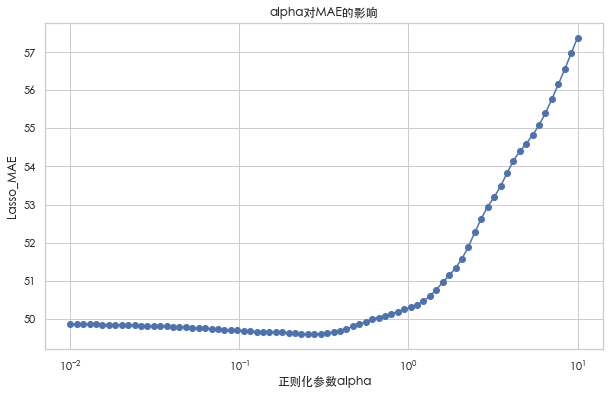

Lasso最佳alpha: 0.2773562614198415
Lasso在测试集上的MAE: 49.69444415212652
Lasso在训练集上的MAE: 49.60863647643519


In [44]:
# 绘制 alpha 和 MAE 的关系图
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, lasso_mae_values, marker='o')
plt.xlabel('正则化参数alpha')
plt.ylabel('Lasso_MAE')
plt.title('alpha对MAE的影响')
plt.grid(True)
plt.show()

# 输出最佳alpha
best_alpha_lasso = alphas[lasso_mae_values.index(min(lasso_mae_values))]
print("Lasso最佳alpha:", best_alpha_lasso)

# 训练最终模型
final_lasso_model = Lasso(alpha=best_alpha_lasso)
final_lasso_model.fit(x_train1, y_train1)

# 在测试集上评估模型
y_pred_best_lasso = final_lasso_model.predict(x_test1)
MAE_best_lasso = mean_absolute_error(y_test1, y_pred_best_lasso)

y_pred_best_lasso_in=final_lasso_model.predict(x_train1)
MAE_best_lasso_in= mean_absolute_error(y_train1, y_pred_best_lasso_in)
print("Lasso在测试集上的MAE:",MAE_best_lasso)
print("Lasso在训练集上的MAE:",MAE_best_lasso_in)

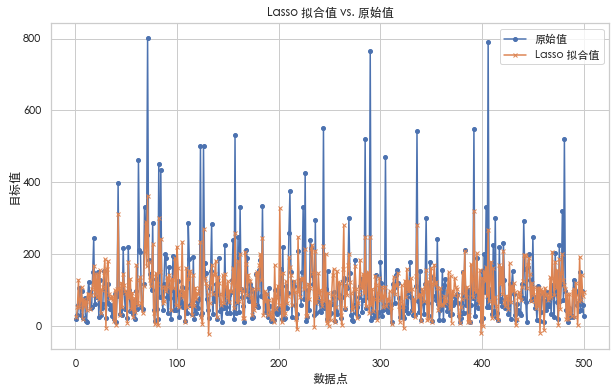

In [45]:
# 选取测试集的前500个数据点
x_test_500 = x_test1[:500]
y_test_500 = y_test1[:500]

# 使用 final_lasso_model 预测
y_pred_lasso = final_lasso_model.predict(x_test_500)

# 绘制拟合值和原始值的图
plt.figure(figsize=(10, 6))
plt.plot(range(1, 501), y_test_500, label='原始值', marker='o', markersize=4)
plt.plot(range(1, 501), y_pred_lasso, label='Lasso 拟合值', marker='x', markersize=4)
plt.xlabel('数据点')
plt.ylabel('目标值')
plt.title('最优alpha下的Lasso 拟合值 vs. 原始值')
plt.grid(True)
plt.legend()
plt.show()

#### （2）Ridge

In [46]:
# Ridge回归下每个 alpha 值的 MAE
ridge_mae_values = []
count = 0
for alpha in alphas:
    ridge_cv=RidgeCV(alphas=[alpha],cv=6)
    ridge_cv.fit(x_train1, y_train1)
    y_pred = ridge_cv.predict(x_train1)
    mae = mean_absolute_error(y_train1, y_pred)
    ridge_mae_values.append(mae)
    count += 1
    if count % 10 == 0:
        print('已经完成计算alpha个数:', count)


已经完成计算alpha个数: 10
已经完成计算alpha个数: 20
已经完成计算alpha个数: 30
已经完成计算alpha个数: 40
已经完成计算alpha个数: 50
已经完成计算alpha个数: 60
已经完成计算alpha个数: 70
已经完成计算alpha个数: 80


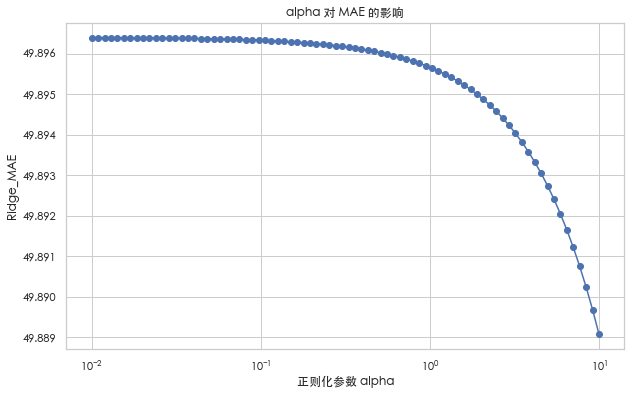

Ridge 最佳 alpha: 10.0
Ridge 在测试集上的 MAE: 49.99315427769013
Ridge 在训练集上的 MAE: 49.8890771756823


In [47]:
# 绘制 alpha 和 MAE 的关系图
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, ridge_mae_values, marker='o')
plt.xlabel('正则化参数 alpha')
plt.ylabel('Ridge_MAE')
plt.title('alpha 对 MAE 的影响')
plt.grid(True)
plt.show()

# 输出最佳 alpha
best_alpha_ridge = alphas[ridge_mae_values.index(min(ridge_mae_values))]
print("Ridge 最佳 alpha:", best_alpha_ridge)

# 训练最终模型
final_ridge_model = Ridge(alpha=best_alpha_ridge)
final_ridge_model.fit(x_train1, y_train1)

# 在测试集上评估模型
y_pred_best_ridge = final_ridge_model.predict(x_test1)
MAE_best_ridge = mean_absolute_error(y_test1, y_pred_best_ridge)

y_pred_best_ridge_in = final_ridge_model.predict(x_train1)
MAE_best_ridge_in = mean_absolute_error(y_train1, y_pred_best_ridge_in)
print("Ridge 在测试集上的 MAE:", MAE_best_ridge)
print("Ridge 在训练集上的 MAE:", MAE_best_ridge_in)

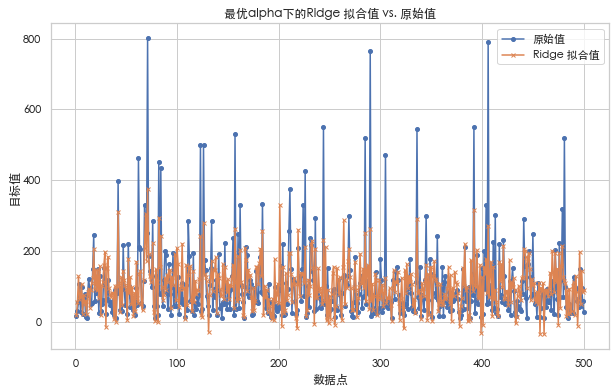

In [48]:
# 选取测试集的前500个数据点
x_test_500 = x_test1[:500]
y_test_500 = y_test1[:500]

# 使用 final_ridge_model 预测
y_pred_ridge = final_ridge_model.predict(x_test_500)

# 绘制拟合值和原始值的图
plt.figure(figsize=(10, 6))
plt.plot(range(1, 501), y_test_500, label='原始值', marker='o', markersize=4)
plt.plot(range(1, 501), y_pred_ridge, label='Ridge 拟合值', marker='x', markersize=4)
plt.xlabel('数据点')
plt.ylabel('目标值')
plt.title('最优alpha下的Ridge 拟合值 vs. 原始值')
plt.grid(True)
plt.legend()
plt.show()

#### 三、ElasticNet

In [50]:
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]  # List of l1_ratios to loop through
best_score = float('inf')
best_alpha = None
best_l1_ratio = None
scores = []

for l1_ratio in l1_ratios:
    score_alpha = []
    count=0
    for alpha in alphas:
        elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elasticnet_model.fit(x_train1, y_train1)
        y_pred = elasticnet_model.predict(x_train1)
        mae = mean_absolute_error(y_train1, y_pred)
        score_alpha.append(mae)
        if mae < best_score:
            best_score = mae
            best_alpha = alpha
            best_l1_ratio = l1_ratio
        count += 1
        if count % 10 == 0:
            print('已经完成计算 alpha 个数：', count)
    scores.append(score_alpha)


已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50
已经完成计算 alpha 个数： 60
已经完成计算 alpha 个数： 70
已经完成计算 alpha 个数： 80
已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50
已经完成计算 alpha 个数： 60
已经完成计算 alpha 个数： 70
已经完成计算 alpha 个数： 80
已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50
已经完成计算 alpha 个数： 60
已经完成计算 alpha 个数： 70
已经完成计算 alpha 个数： 80
已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50
已经完成计算 alpha 个数： 60
已经完成计算 alpha 个数： 70
已经完成计算 alpha 个数： 80
已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50
已经完成计算 alpha 个数： 60
已经完成计算 alpha 个数： 70
已经完成计算 alpha 个数： 80


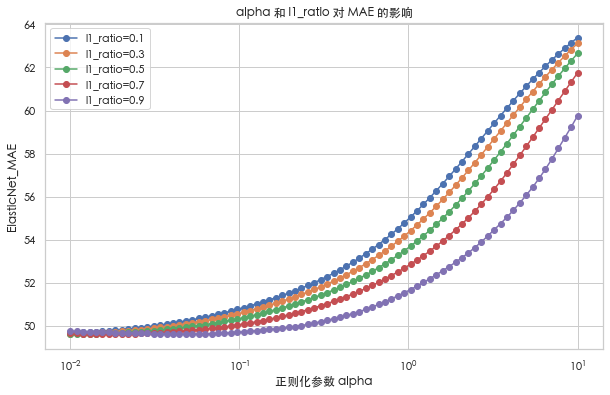

最佳 alpha: 0.04421499907374487
最佳 l1_ratio: 0.9
Elastic Net 在测试集上的 MAE: 49.730708618159724
Elastic Net 在训练集上的 MAE: 49.63758222365517


In [51]:
# 绘制 MAE vs. alpha 曲线
plt.figure(figsize=(10, 6))
for i, l1_ratio in enumerate(l1_ratios):
    plt.semilogx(alphas, scores[i], label=f"l1_ratio={l1_ratio}", marker='o')

plt.xlabel('正则化参数 alpha')
plt.ylabel('ElasticNet_MAE')
plt.title('alpha 和 l1_ratio 对 MAE 的影响')
plt.grid(True)
plt.legend()
plt.show()

# 输出最佳 alpha 和 l1_ratio
print("最佳 alpha:", best_alpha)
print("最佳 l1_ratio:", best_l1_ratio)

# 训练最终模型
final_elastic_net_model_cv = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
final_elastic_net_model_cv.fit(x_train1, y_train1)

# 在测试集上评估模型
y_pred_best_elastic_net = final_elastic_net_model.predict(x_test1)
MAE_best_elastic_net = mean_absolute_error(y_test1, y_pred_best_elastic_net)

y_pred_best_elastic_net_in = final_elastic_net_model.predict(x_train1)
MAE_best_elastic_net_in = mean_absolute_error(y_train1, y_pred_best_elastic_net_in)
print("Elastic Net 在测试集上的 MAE:", MAE_best_elastic_net)
print("Elastic Net 在训练集上的 MAE:", MAE_best_elastic_net_in)


### 二、运用cross_var_score寻找使得平均MAE最优的alpha

#### （1）Lasso_Cross_Var_Score

已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50
已经完成计算 alpha 个数： 60
已经完成计算 alpha 个数： 70
已经完成计算 alpha 个数： 80
已经完成计算 alpha 个数： 90
已经完成计算 alpha 个数： 100


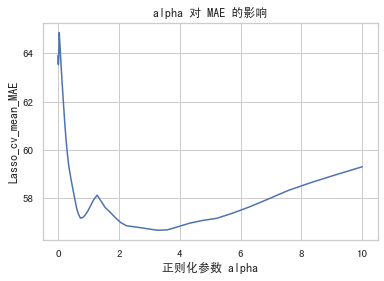

Lasso最佳alpha: 3.2745491628777317


Lasso(alpha=3.2745491628777317)

In [24]:
#对Lasso方法运用cross_var_score
score = []
alphas = np.logspace(-3, 1, 100,base=10) 
count=0
for alpha in alphas:
    lasso_cross_var_score = Lasso(alpha)
    sc =( -cross_val_score(lasso_cross_var_score,x1,y1,scoring='neg_mean_absolute_error', cv = 6))
    score.append(sc.mean())
    count+=1
    if count%10==0:
        print('已经完成计算 alpha 个数：', count)
plt.plot(alphas,score)
plt.xlabel('正则化参数 alpha')
plt.ylabel('Lasso_cv_mean_MAE')
plt.title('alpha 对 MAE 的影响')
plt.grid(True)
plt.show()

# 输出最佳alpha
best_alpha_lasso_cv = alphas[score.index(min(score))]
print("Lasso最佳alpha:", best_alpha_lasso_cv)

# 训练最终模型
final_lasso_model_cv = Lasso(alpha=best_alpha_lasso_cv)
final_lasso_model_cv.fit(x_train1, y_train1)

#### （2）Ridge_Cross_Var_Score

已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50
已经完成计算 alpha 个数： 60
已经完成计算 alpha 个数： 70
已经完成计算 alpha 个数： 80
已经完成计算 alpha 个数： 90
已经完成计算 alpha 个数： 100


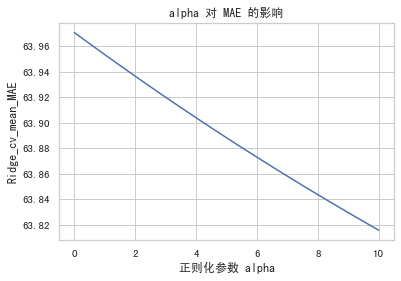

Ridge 最佳 alpha: 10.0


Ridge(alpha=10.0)

In [25]:
#对Ridge方法运用cross_var_score
score = []
alphas = np.logspace(-3, 1, 100,base=10) 
count=0
for alpha in alphas:
    ridge_cross_var_score = Ridge(alpha)
    sc =( -cross_val_score(ridge_cross_var_score,x1,y1,scoring='neg_mean_absolute_error', cv = 6))
    score.append(sc.mean())
    count+=1
    if count%10==0:
        print('已经完成计算 alpha 个数：', count)
plt.plot(alphas,score)
plt.xlabel('正则化参数 alpha')
plt.ylabel('Ridge_cv_mean_MAE')
plt.title('alpha 对 MAE 的影响')
plt.grid(True)
plt.show()

# 输出最佳 alpha$
best_alpha_ridge_cv = alphas[score.index(min(score))]
print("Ridge 最佳 alpha:", best_alpha_ridge_cv)

# 训练最终模型
final_ridge_model_cv = Ridge(alpha=best_alpha_ridge_cv)
final_ridge_model_cv.fit(x_train1, y_train1)

#### (3)ElasticNet_Cross_Var_Score

In [107]:
#对ElasticNet方法运用cross_var_score
scores = []
alphas = np.logspace(-2, 1, 50,base=10)
l1_ratios = [0.1,0.3,0.5, 0.7,0.9]
best_score = float('inf')
best_alpha = None
best_l1_ratio = None
for l1_ratio in l1_ratios:
    score_alpha = []
    count=0
    for alpha in alphas:
        elasticnet_cross_var_score = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        sc = -cross_val_score(elasticnet_cross_var_score, x1, y1, scoring='neg_mean_absolute_error', cv=6)
        mean_score = sc.mean()
        score_alpha.append(mean_score)
        if mean_score < best_score:
            best_score = mean_score
            best_alpha = alpha
            best_l1_ratio = l1_ratio
        count += 1
        if count % 10 == 0:
            print('已经完成计算 alpha 个数：', count)
    scores.append(score_alpha)


已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50
已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50
已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50
已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50
已经完成计算 alpha 个数： 10
已经完成计算 alpha 个数： 20
已经完成计算 alpha 个数： 30
已经完成计算 alpha 个数： 40
已经完成计算 alpha 个数： 50


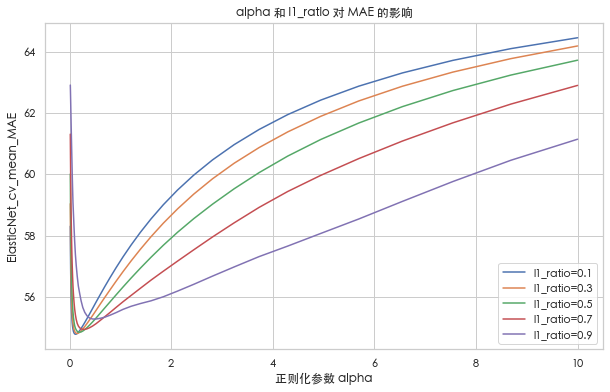

最佳 alpha: 0.10985411419875583
最佳 l1_ratio: 0.1


ElasticNet(alpha=0.10985411419875583, l1_ratio=0.1)

In [108]:
plt.figure(figsize=(10, 6))
for i, l1_ratio in enumerate(l1_ratios):
    plt.plot(alphas, scores[i], label=f"l1_ratio={l1_ratio}")

plt.xlabel('正则化参数 alpha')
plt.ylabel('ElasticNet_cv_mean_MAE')
plt.title('alpha 和 l1_ratio 对 MAE 的影响')
plt.grid(True)
plt.legend()
plt.show()

best_alpha_elastic_net_cv=best_alpha.copy()
print("最佳 alpha:", best_alpha_elastic_net_cv)
print("最佳 l1_ratio:", best_l1_ratio)

# 训练最终模型
final_elastic_net_model_cv = ElasticNet(alpha=best_alpha_elastic_net_cv, l1_ratio=best_l1_ratio)
final_elastic_net_model_cv.fit(x_train1, y_train1)

#### （4）选出Alpha汇总

In [109]:
# MAE选出最优alpha
mae_alphas = [best_alpha_lasso, best_alpha_ridge, best_alpha_elastic_net]

# Cross_Var_Score选出最优alpha
cvs_alphas = [best_alpha_lasso_cv, best_alpha_ridge_cv, best_alpha_elastic_net_cv]

best_alphas = pd.DataFrame([mae_alphas, cvs_alphas], index=['alpha_mean_absolute_error', 'alpha_cross_validation_score'], columns=['Lasso', 'Ridge', 'Elastic Net'])

best_alphas

,Lasso,Ridge,Elastic Net
alpha_mean_absolute_error,0.277356,10.0,0.010235
alpha_cross_validation_score,3.274549,10.0,0.109854


### 三、加入非线性和交互项

In [124]:
final_data_nonlinear = pd.read_csv('final_data_nonlinear_1106.csv')
final_data_nonlinear

,listing_id,price(dollar),host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,minimum_nights,review_scores_cleanliness,review_scores_communication,review_scores_location,...,amenity_num_Sydney,amenity_num_instant_bookable,amenity_num_Cape Town,distance_2,distance_Istanbul,distance_Paris,distance_Mexico City,distance_Bangkok,distance_Sydney,distance_Cape Town
0,281420,62.492300,0.431322,-0.083022,-0.604055,-0.430301,-0.408109,0.465,0.273515,0.34915,...,-0.0,-0.000000,-0.000000,0.016953,0.0,0.130205,0.0,0.0,0.0,0.000000
1,3705183,141.492000,0.431322,-0.083022,-0.604055,-0.430301,-0.408109,0.465,0.273515,0.34915,...,-0.0,-0.000000,-0.000000,0.002571,-0.0,-0.050702,-0.0,-0.0,-0.0,-0.000000
2,4082273,104.939900,0.431322,-0.083022,-0.604055,-0.430301,-0.408109,0.465,0.273515,0.34915,...,-0.0,-0.000000,-0.000000,0.279735,0.0,0.528900,0.0,0.0,0.0,0.000000
3,4797344,68.387800,0.431322,-0.083022,-0.604055,-0.430301,-0.408109,0.465,0.273515,0.34915,...,-0.0,-0.000000,-0.000000,1.229978,0.0,1.109044,0.0,0.0,0.0,0.000000
4,4823489,70.746000,0.431322,-0.083022,-0.604055,-0.430301,-0.408109,0.465,0.273515,0.34915,...,-0.0,-0.000000,-0.000000,8.244479,0.0,2.871320,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279542,16079231,59.779766,-3.755581,-0.083022,-0.135334,-0.430301,-0.408109,0.465,0.273515,0.34915,...,0.0,0.000000,0.372419,0.030538,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.174753
279543,18052019,50.473143,-2.373903,-0.083022,0.802107,-0.430301,-0.408109,0.465,0.273515,0.34915,...,0.0,0.000000,0.588813,4.048313,0.0,0.000000,0.0,0.0,0.0,2.012042
279544,18248493,36.886833,0.431322,-0.083022,-0.604055,-0.430301,6.112522,0.465,0.273515,0.34915,...,0.0,0.000000,0.913405,0.583548,0.0,0.000000,0.0,0.0,0.0,0.763903
279545,20044773,27.172621,-0.322321,-0.083022,-0.604055,-0.430301,-0.489617,0.465,0.273515,0.34915,...,0.0,0.913405,0.913405,17.619602,0.0,0.000000,0.0,0.0,0.0,4.197571


In [125]:
#离群值处理
q1 = final_data_nonlinear['price(dollar)'].quantile(0.01)
q99 = final_data_nonlinear['price(dollar)'].quantile(0.99)
    
# 使用条件筛选，保留在分位数范围内的数据
final_data_nonlinear = final_data_nonlinear[(final_data_nonlinear['price(dollar)'] >= q1) & (final_data_nonlinear['price(dollar)'] <= q99)]

In [126]:
x2=final_data_nonlinear.iloc[:,2:]
y2=final_data_nonlinear.iloc[:,1]
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=111)

#### （1）OLS

In [127]:
LinearRegression2 = LinearRegression()
LinearRegression2.fit(x_train2, y_train2)
y_pred_LR2 = LinearRegression2.predict(x_test2)
mean_absolute_error_LR2 = mean_absolute_error(y_test2, y_pred_LR2)
print("截距：", LinearRegression2.intercept_)
print("系数：", LinearRegression2.coef_)
print('Out-sample MAE:',mean_absolute_error_LR2)

#用回归模型的决定系数（R^2值），也称为拟合优度进行打分
print("LinearRegression训练模型得分:"+str(r2_score(y_train2,LinearRegression2.predict(x_train2))))
print("LinearRegression待测模型得分:"+str(r2_score(y_test2,y_pred_LR2)))

截距： 83.68918734870816
系数： [  1.02949339   7.75569919  20.93088372  37.11319513  -2.96383197
   5.64105378  -2.28048705   4.30428297  -1.50654267  -9.15851831
  10.61708939 -15.40187709   3.31598121 -15.57379659  -9.34554667
  -0.40911924   6.54981011  81.39260503  59.96363437 -42.576448
  35.39236075 -42.34122779 -28.47676752  22.28770686  -0.63488852
  -9.86291512  21.76114164 -12.64752793  -8.56124259  24.32596672
  21.86247966  -0.42676228  26.8426046   -0.80837219  -7.44929734
  -1.13974337  -5.64758763  -5.50384996  -3.2654169   28.92995948
  -6.97309554  -6.95455474   2.67814358   7.28359628  26.70229657
  -1.06618552  16.5246665   -1.37028681   4.82696097   6.92263548
  12.48247235  10.59133713   4.30832084   0.23638989   3.3090459
  -0.29336417   0.62789529   0.56021226  -0.58847041   0.75966861
   4.65646969   2.76602485   3.78391356  22.28391716  14.90321723
   0.36244582   6.33119522 -14.11536147   1.34395664 -11.29538395
   7.40812332  -1.02966979  15.80388208   2.54921635 

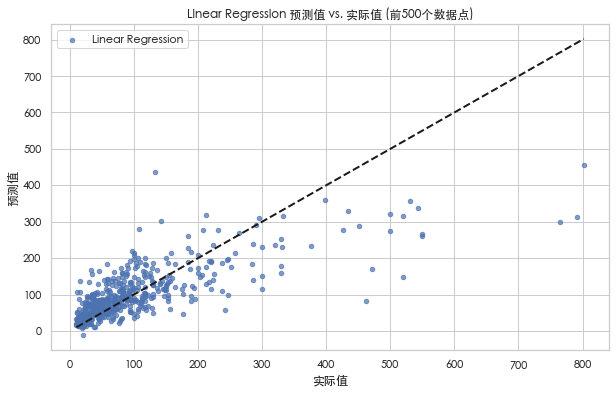

In [128]:

# 选取测试集的前500个数据点
x2_test_500 = x_test2[:500]
y2_test_500 = y_test2[:500]

# 使用 Linear Regression 模型预测
y2_pred_LR_500 = LinearRegression2.predict(x2_test_500)

# 绘制预测值和实际值的图
plt.figure(figsize=(10, 6))
plt.scatter(y2_test_500, y2_pred_LR_500, label='Linear Regression', s=20, alpha=0.7)
plt.plot([min(y2_test_500), max(y2_test_500)], [min(y2_test_500), max(y2_test_500)], '--k', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.legend()
plt.title('Linear Regression 预测值 vs. 实际值 (前500个数据点)')
plt.grid(True)
plt.show()

#### （2）Lasso

In [129]:
lasso2 = Lasso(alpha=0.1)
lasso2.fit(x_train2, y_train2)
y_pred_lasso2 = lasso2.predict(x_test2)
mean_absolute_error_lasso2 = mean_absolute_error(y_test2, y_pred_lasso2)
print("截距：", lasso2.intercept_)
print("系数：", lasso2.coef_)
print('Out-sample MAE:',mean_absolute_error_lasso2)

#用回归模型的决定系数（R^2值），也称为拟合优度进行打分
print("Lasso训练模型得分:"+str(r2_score(y_train2,lasso2.predict(x_train2))))
print("Lasso待测模型得分:"+str(r2_score(y_test2,y_pred_lasso2)))

截距： 77.27237313266275
系数： [ 7.20643399e-01  7.72484823e+00  2.20632057e+01  3.49439120e+01
 -1.50037346e+00  5.37916942e+00 -2.09760003e+00  4.35720696e+00
 -0.00000000e+00 -8.38567228e+00  1.02771743e+01 -1.43905319e+01
  3.84000882e+00 -1.25411839e+01 -0.00000000e+00 -2.82384181e-02
  5.09785884e+00  7.53853513e+01  5.39653439e+01 -4.12163375e+01
  3.19700012e+01 -4.25848375e+01 -2.70625016e+01  1.74737065e+01
 -6.59484789e-01 -9.87283486e+00  1.95770479e+01 -1.25193798e+01
 -9.35952953e+00  2.16315747e+01  1.98410471e+01 -3.65790659e-01
  2.15711157e+01 -8.32141867e-01 -4.14966755e+00  1.36925694e+00
 -2.34717543e+00 -1.42797389e+00  0.00000000e+00  3.10002259e+01
 -7.28780845e+00 -0.00000000e+00  1.81278790e+00  3.81856405e+00
  2.22263757e+01 -1.29433285e+00  1.13215019e+01 -6.49361625e-01
  4.75703366e+00  5.71708130e+00  1.09784494e+01  7.75710331e+00
  3.83961020e+00 -0.00000000e+00  2.65546530e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.14246264e-01  6.31701693e-01

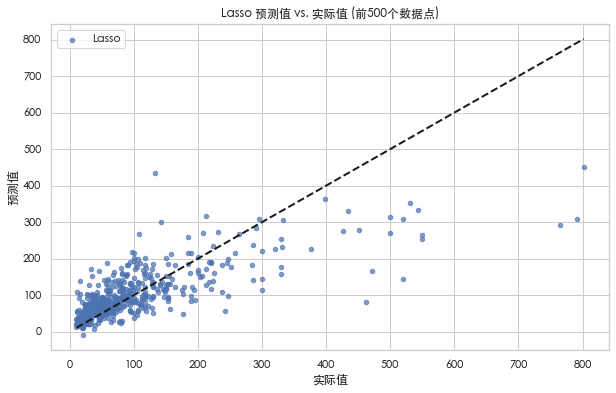

In [130]:
# 选取测试集的前500个数据点
x_test_500 = x_test2[:500]
y_test_500 = y_test2[:500]

# 使用 Lasso 模型预测
y2_pred_lasso_500 = lasso2.predict(x_test_500)

# 绘制预测值和实际值的图
plt.figure(figsize=(10, 6))
plt.scatter(y_test_500, y2_pred_lasso_500, label='Lasso', s=20, alpha=0.7)
plt.plot([min(y_test_500), max(y_test_500)], [min(y_test_500), max(y_test_500)], '--k', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.legend()
plt.title('Lasso 预测值 vs. 实际值 (前500个数据点)')
plt.grid(True)
plt.show()


#### （3）Ridge

In [131]:
ridge2 = Ridge(alpha=0.1)
ridge2.fit(x_train2, y_train2)
y_pred_ridge2 = ridge2.predict(x_test2)
mean_absolute_error_ridge2 = mean_absolute_error(y_test2, y_pred_ridge2)
print("截距：", ridge2.intercept_)
print("系数：", ridge2.coef_)
print('Out-sample MAE:',mean_absolute_error_ridge2)

#用回归模型的决定系数（R^2值），也称为拟合优度进行打分
print("Ridge训练模型得分:"+str(r2_score(y_train2,ridge2.predict(x_train2))))
print("Ridge待测模型得分:"+str(r2_score(y_test2,y_pred_ridge2)))

截距： 83.6882504546593
系数： [  1.02948905   7.75570904  20.93114099  37.11284196  -2.96371194
   5.64102727  -2.28049269   4.30430941  -1.50637733  -9.1585465
  10.61703959 -15.40183105   3.31609627 -15.57351309  -9.34423656
  -0.40916272   6.54976891  81.39131681  59.96243623 -42.57532589
  35.39185958 -42.34099214 -28.4766202   22.28716206  -0.63489189
  -9.8631109   21.7607499  -12.64763883  -8.56147623  24.3254289
  21.86221107  -0.42682244  26.84183735  -0.8083738   -7.4489246
  -1.13930051  -5.64725728  -5.50342963  -3.26482691  28.93017293
  -6.97306059  -6.95369764   2.67806124   7.28337687  26.70143569
  -1.06685238  16.52401276  -1.37026867   4.82697854   6.92265049
  12.48228766  10.59110437   4.30832247   0.23636777   3.30916418
  -0.29339291   0.62788585   0.5600533   -0.58861855   0.75967497
   4.65628849   2.76605992   3.78381028  22.28365736  14.90193625
   0.36259088   6.33112907 -14.11447143   1.34394895 -11.294323
   7.40801127  -1.02969498  15.80300426   2.54916333   7

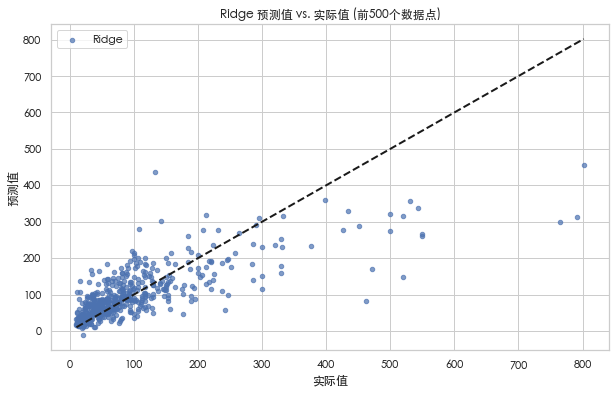

In [132]:
# 选取测试集的前500个数据点
x_test_500 = x_test2[:500]
y_test_500 = y_test2[:500]

# 使用 Ridge 模型预测
y2_pred_ridge_500 = ridge2.predict(x_test_500)

# 绘制预测值和实际值的图
plt.figure(figsize=(10, 6))
plt.scatter(y_test_500, y2_pred_ridge_500, label='Ridge', s=20, alpha=0.7)
plt.plot([min(y_test_500), max(y_test_500)], [min(y_test_500), max(y_test_500)], '--k', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.legend()
plt.title('Ridge 预测值 vs. 实际值 (前500个数据点)')
plt.grid(True)
plt.show()


#### （4）ElasticNet

In [133]:
elastic_net2 = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net2.fit(x_train2, y_train2)
y_pred_elastic2 =elastic_net2.predict(x_test2)
mean_absolute_error_elastic2 = mean_absolute_error(y_test2, y_pred_elastic2)
print("截距：", elastic_net2.intercept_)
print("系数：", elastic_net2.coef_)
print('Out-sample MAE:',mean_absolute_error_elastic2)

#用回归模型的决定系数（R^2值），也称为拟合优度进行打分
print("Elastic Net训练模型得分:"+str(r2_score(y_train2,elastic_net2.predict(x_train2))))
print("Elastic Net待测模型得分:"+str(r2_score(y_test2,y_pred_elastic2)))

截距： 88.04374085518432
系数： [  0.48618358   7.78437035  24.56007918  30.93520609   1.7269192
   4.16413239  -2.02525157   5.11894335   0.          -4.86526946
   9.71213552 -12.93856126   6.42437964  -4.3120288   -0.
  -1.93036448   3.7283896   34.09291837  20.46771268 -16.48973797
  16.11921112 -24.89870316 -17.34848952   6.08450185  -0.61453726
  -7.633439    11.82725194  -6.75792772  -6.12656924  11.38251909
  17.4465764   -2.25494672  11.06300601  -0.79024951  -4.41970468
   4.2429381   -3.49487009  -1.70544476   3.65755057  21.97611567
  -3.88744735   5.56253484  -0.15900646   1.81862741  -0.78589357
 -11.72439241   0.          -2.45047526   5.10247874   4.04050107
   5.90460262  -0.           3.57916413  -0.6024198    6.34580144
  -0.07596394   3.32992458  -2.75503038  -2.61497584   1.35640551
  -0.           3.07465086   0.          11.17541544  -1.90906603
   0.48109225   2.41486183  -1.62109728   1.74397236  -2.12399448
   3.05514936  -1.68020203   1.97364341   0.10795247   8.98

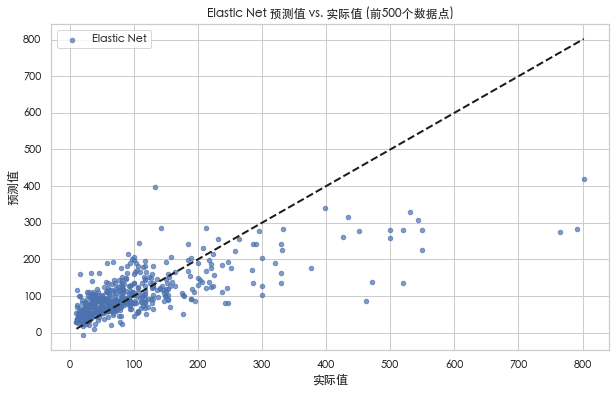

In [134]:
# 选取测试集的前500个数据点
x_test_500 = x_test2[:500]
y_test_500 = y_test2[:500]

# 使用 Elastic Net 模型预测
y2_pred_elastic_500 = elastic_net2.predict(x_test_500)

# 绘制预测值和实际值的图
plt.figure(figsize=(10, 6))
plt.scatter(y_test_500, y2_pred_elastic_500, label='Elastic Net', s=20, alpha=0.7)
plt.plot([min(y_test_500), max(y_test_500)], [min(y_test_500), max(y_test_500)], '--k', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.legend()
plt.title('Elastic Net 预测值 vs. 实际值 (前500个数据点)')
plt.grid(True)
plt.show()


 ## 第五部分：模型结果报告
 这一部分我们对于之前超参调优后的模型和加入非线性项和交互项的模型进行了评估，评估的可视化结果位于本部分后半部分。
 ### 一、结果分析

In [135]:
model_names = ['OLS', 'Lasso', 'Ridge', 'Elastic Net']
metrics_names = ['In sample', 'Cross-validation', 'Testing', 'Total N of Predictions after dropping outliers']

In [136]:
perf = pd.DataFrame(index=model_names, columns=metrics_names)

In [137]:
# OLS performance
y_pred_LR1_in = LinearRegression1.predict(x_train1)
y_pred_LR1_out = LinearRegression1.predict(x_test1)
perf['In sample']['OLS'] = mean_absolute_error(y_train1, y_pred_LR1_in)
perf['Cross-validation']['OLS'] = -cross_val_score(LinearRegression1, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf['Testing']['OLS'] = mean_absolute_error(y_test1, y_pred_LR1_out)
perf['Total N of Predictions after dropping outliers']['OLS'] = len(x_test1)


In [138]:
# Lasso performance
y_pred_lasso1_in = lasso1.predict(x_train1)
y_pred_lasso1_out = lasso1.predict(x_test1)
perf['In sample']['Lasso'] = mean_absolute_error(y_train1, y_pred_lasso1_in)
perf['Cross-validation']['Lasso'] = -cross_val_score(lasso1, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf['Testing']['Lasso'] = mean_absolute_error(y_test1, y_pred_lasso1_out)
perf['Total N of Predictions after dropping outliers']['Lasso'] = len(x_test1)

In [139]:
# Ridge performance
y_pred_ridge1_in = ridge1.predict(x_train1)
y_pred_ridge1_out = ridge1.predict(x_test1)
perf['In sample']['Ridge'] = mean_absolute_error(y_train1, y_pred_ridge1_in)
perf['Cross-validation']['Ridge'] = -cross_val_score(ridge1, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf['Testing']['Ridge'] = mean_absolute_error(y_test1, y_pred_ridge1_out)
perf['Total N of Predictions after dropping outliers']['Ridge'] = len(x_test1)

In [140]:
# Elastic Net performance
y_pred_elastic_net1_in = elastic_net1.predict(x_train1)
y_pred_elastic_net1_out = elastic_net1.predict(x_test1)
perf['In sample']['Elastic Net'] = mean_absolute_error(y_train1, y_pred_elastic_net1_in)
perf['Cross-validation']['Elastic Net'] = -cross_val_score(elastic_net1, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf['Testing']['Elastic Net'] = mean_absolute_error(y_test1, y_pred_elastic_net1_out)
perf['Total N of Predictions after dropping outliers']['Elastic Net'] = len(x_test1)

### （1）MAE优化后Alpha

In [141]:
perf_mae_alpha = pd.DataFrame(index=model_names, columns=metrics_names)

In [142]:
# OLS performance
y_pred_LR1_in = LinearRegression1.predict(x_train1)
y_pred_LR1_out = LinearRegression1.predict(x_test1)
perf_mae_alpha['In sample']['OLS'] = mean_absolute_error(y_train1, y_pred_LR1_in)
perf_mae_alpha['Cross-validation']['OLS'] = -cross_val_score(LinearRegression1, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_mae_alpha['Testing']['OLS'] = mean_absolute_error(y_test1, y_pred_LR1_out)
perf_mae_alpha['Total N of Predictions after dropping outliers']['OLS'] = len(x_test1)

In [143]:
# Lasso performance
y_pred_lasso1_in = final_lasso_model.predict(x_train1)
y_pred_lasso1_out = final_lasso_model.predict(x_test1)
perf_mae_alpha['In sample']['Lasso'] = mean_absolute_error(y_train1, y_pred_lasso1_in)
perf_mae_alpha['Cross-validation']['Lasso'] = -cross_val_score(final_lasso_model, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_mae_alpha['Testing']['Lasso'] = mean_absolute_error(y_test1, y_pred_lasso1_out)
perf_mae_alpha['Total N of Predictions after dropping outliers']['Lasso'] = len(x_test1)

In [144]:
# Ridge performance
y_pred_ridge1_in = final_ridge_model.predict(x_train1)
y_pred_ridge1_out = final_ridge_model.predict(x_test1)
perf_mae_alpha['In sample']['Ridge'] = mean_absolute_error(y_train1, y_pred_ridge1_in)
perf_mae_alpha['Cross-validation']['Ridge'] = -cross_val_score(final_ridge_model, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_mae_alpha['Testing']['Ridge'] = mean_absolute_error(y_test1, y_pred_ridge1_out)
perf_mae_alpha['Total N of Predictions after dropping outliers']['Ridge'] = len(x_test1)

In [145]:
# Elastic Net performance
y_pred_elastic_net1_in = final_elastic_net_model.predict(x_train1)
y_pred_elastic_net1_out = final_elastic_net_model.predict(x_test1)
perf_mae_alpha['In sample']['Elastic Net'] = mean_absolute_error(y_train1, y_pred_elastic_net1_in)
perf_mae_alpha['Cross-validation']['Elastic Net'] = -cross_val_score(final_elastic_net_model, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_mae_alpha['Testing']['Elastic Net'] = mean_absolute_error(y_test1, y_pred_elastic_net1_out)
perf_mae_alpha['Total N of Predictions after dropping outliers']['Elastic Net'] = len(x_test1)

#### (2)Cross-Vaidation Score最优alpha

In [85]:
perf_cvs_alpha = pd.DataFrame(index=model_names, columns=metrics_names)

In [86]:
# OLS performance
y_pred_LR1_in = LinearRegression1.predict(x_train1)
y_pred_LR1_out = LinearRegression1.predict(x_test1)
perf_cvs_alpha['In sample']['OLS'] = mean_absolute_error(y_train1, y_pred_LR1_in)
perf_cvs_alpha['Cross-validation']['OLS'] = -cross_val_score(LinearRegression1, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_cvs_alpha['Testing']['OLS'] = mean_absolute_error(y_test1, y_pred_LR1_out)
perf_cvs_alpha['Total N of Predictions after dropping outliers']['OLS'] = len(x_test1)

In [87]:
# Lasso performance
y_pred_lasso1_in = final_lasso_model_cv.predict(x_train1)
y_pred_lasso1_out = final_lasso_model_cv.predict(x_test1)
perf_cvs_alpha['In sample']['Lasso'] = mean_absolute_error(y_train1, y_pred_lasso1_in)
perf_cvs_alpha['Cross-validation']['Lasso'] = -cross_val_score(final_lasso_model_cv, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_cvs_alpha['Testing']['Lasso'] = mean_absolute_error(y_test1, y_pred_lasso1_out)
perf_cvs_alpha['Total N of Predictions after dropping outliers']['Lasso'] = len(x_test1)

In [88]:
# Ridge performance
y_pred_ridge1_in = final_ridge_model_cv.predict(x_train1)
y_pred_ridge1_out = final_ridge_model_cv.predict(x_test1)
perf_cvs_alpha['In sample']['Ridge'] = mean_absolute_error(y_train1, y_pred_ridge1_in)
perf_cvs_alpha['Cross-validation']['Ridge'] = -cross_val_score(final_ridge_model_cv, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_cvs_alpha['Testing']['Ridge'] = mean_absolute_error(y_test1, y_pred_ridge1_out)
perf_cvs_alpha['Total N of Predictions after dropping outliers']['Ridge'] = len(x_test1)

In [89]:
# Elastic Net performance
y_pred_elastic_net1_in = final_elastic_net_model_cv.predict(x_train1)
y_pred_elastic_net1_out = final_elastic_net_model_cv.predict(x_test1)
perf_cvs_alpha['In sample']['Elastic Net'] = mean_absolute_error(y_train1, y_pred_elastic_net1_in)
perf_cvs_alpha['Cross-validation']['Elastic Net'] = -cross_val_score(final_elastic_net_model_cv, x1, y1, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_cvs_alpha['Testing']['Elastic Net'] = mean_absolute_error(y_test1, y_pred_elastic_net1_out)
perf_cvs_alpha['Total N of Predictions after dropping outliers']['Elastic Net'] = len(x_test1)

#### (3)加入Non-linearity和Interaction

In [90]:
perf_nonl = pd.DataFrame(index=model_names, columns=metrics_names)

In [91]:
# OLS performance
y_pred_LR2_in = LinearRegression2.predict(x_train2)
y_pred_LR2_out = LinearRegression2.predict(x_test2)
perf_nonl['In sample']['OLS'] = mean_absolute_error(y_train2, y_pred_LR2_in)
perf_nonl['Cross-validation']['OLS'] = -cross_val_score(LinearRegression2, x2, y2, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_nonl['Testing']['OLS'] = mean_absolute_error(y_test2, y_pred_LR2_out)
perf_nonl['Total N of Predictions after dropping outliers']['OLS'] = len(x_test2)

In [92]:
# Lasso performance
y_pred_lasso2_in = lasso2.predict(x_train2)
y_pred_lasso2_out = lasso2.predict(x_test2)
perf_nonl['In sample']['Lasso'] = mean_absolute_error(y_train2, y_pred_lasso2_in)
perf_nonl['Cross-validation']['Lasso'] = -cross_val_score(lasso2, x2, y2, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_nonl['Testing']['Lasso'] = mean_absolute_error(y_test2, y_pred_lasso2_out)
perf_nonl['Total N of Predictions after dropping outliers']['Lasso'] = len(x_test2)

In [93]:
# Ridge performance
y_pred_ridge2_in = ridge2.predict(x_train2)
y_pred_ridge2_out = ridge2.predict(x_test2)
perf_nonl['In sample']['Ridge'] = mean_absolute_error(y_train2, y_pred_ridge2_in)
perf_nonl['Cross-validation']['Ridge'] = -cross_val_score(ridge2, x2, y2, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_nonl['Testing']['Ridge'] = mean_absolute_error(y_test2, y_pred_ridge2_out)
perf_nonl['Total N of Predictions after dropping outliers']['Ridge'] = len(x_test2)

In [94]:
# Elastic Net performance
y_pred_elastic_net2_in = elastic_net2.predict(x_train2)
y_pred_elastic_net2_out = elastic_net2.predict(x_test2)
perf_nonl['In sample']['Elastic Net'] = mean_absolute_error(y_train2, y_pred_elastic_net2_in)
perf_nonl['Cross-validation']['Elastic Net'] = -cross_val_score(elastic_net2, x2, y2, 
                                                   cv = 6, scoring='neg_mean_absolute_error').mean()
perf_nonl['Testing']['Elastic Net'] = mean_absolute_error(y_test2, y_pred_elastic_net2_out)
perf_nonl['Total N of Predictions after dropping outliers']['Elastic Net'] = len(x_test2)

### 二、结果可视化展示
这一部分我们展示了不同优化方式下模型的表现，其中各项数值表示对应模型预测值与原始值之间的MAE。

In [95]:
print('原始模型表现：')
perf

原始模型表现：


,In sample,Cross-validation,Testing,Total N of Predictions after dropping outliers
OLS,49.896406,63.970908,50.000355,54807
Lasso,49.700996,63.62267,49.816962,54807
Ridge,49.896331,63.969152,50.000282,54807
Elastic Net,50.345709,55.019952,50.304128,54807


In [96]:
print('MAE调优模型表现：')
perf_mae_alpha

MAE调优模型表现：


,In sample,Cross-validation,Testing,Total N of Predictions after dropping outliers
OLS,49.896406,63.970908,50.000355,54807
Lasso,49.608636,60.306749,49.694444,54807
Ridge,49.889077,63.815572,49.993154,54807
Elastic Net,49.637582,59.949877,49.730709,54807


In [97]:
print('Cross-Validation调优模型表现：')
perf_cvs_alpha

Cross-Validation调优模型表现：


,In sample,Cross-validation,Testing,Total N of Predictions after dropping outliers
OLS,49.896406,63.970908,50.000355,54807
Lasso,53.253909,56.674648,53.074528,54807
Ridge,49.889077,63.815572,49.993154,54807
Elastic Net,50.9145,54.832784,50.8293,54807


In [98]:
print('加入非线性和交互项模型表现：')
perf_nonl

加入非线性和交互项模型表现：


,In sample,Cross-validation,Testing,Total N of Predictions after dropping outliers
OLS,46.707931,51.768122,46.65862,54807
Lasso,46.701773,51.649992,46.643365,54807
Ridge,46.707917,51.768061,46.658604,54807
Elastic Net,47.89794,52.716032,47.796582,54807


In [99]:
OLS_coef = abs(LinearRegression2.coef_)

feature_names = x2.columns
OLS_coef = pd.DataFrame(OLS_coef, index=feature_names)
OLS_coef

,0
host_acceptance_rate,1.029493
host_total_listings_count,7.755699
accommodates,20.930884
bedrooms,37.113195
minimum_nights,2.963832
...,...
distance_Paris,1.581980
distance_Mexico City,8.368909
distance_Bangkok,7.261785
distance_Sydney,9.038823


### 三、特征贡献度分析
这一部分我们分析了不同特征对于模型的重要性，并将结果以可视化的方式呈现了出来。

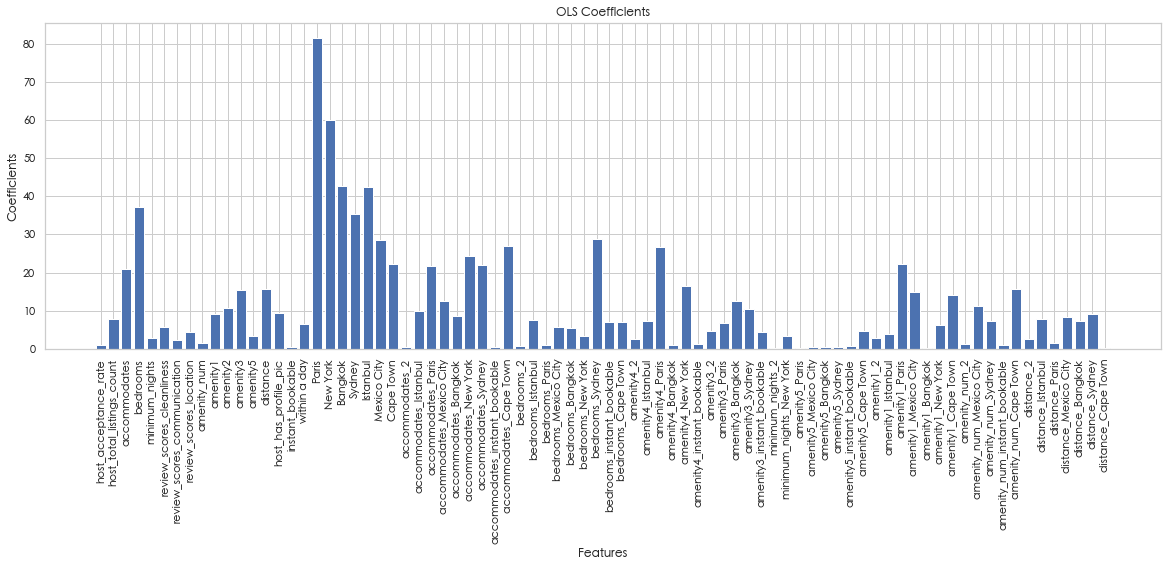

In [103]:
# 绘制回归系数
plt.figure(figsize=(20, 6))
plt.bar(OLS_coef.index, OLS_coef[0])
plt.title('OLS Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.xticks(rotation=90)
plt.show()

In [101]:
OLS_coef[0].nlargest(10)

Paris                     81.392605
New York                  59.963634
Bangkok                   42.576448
Istanbul                  42.341228
bedrooms                  37.113195
Sydney                    35.392361
bedrooms_Sydney           28.929959
Mexico City               28.476768
accommodates_Cape Town    26.842605
amenity4_Paris            26.702297
Name: 0, dtype: float64

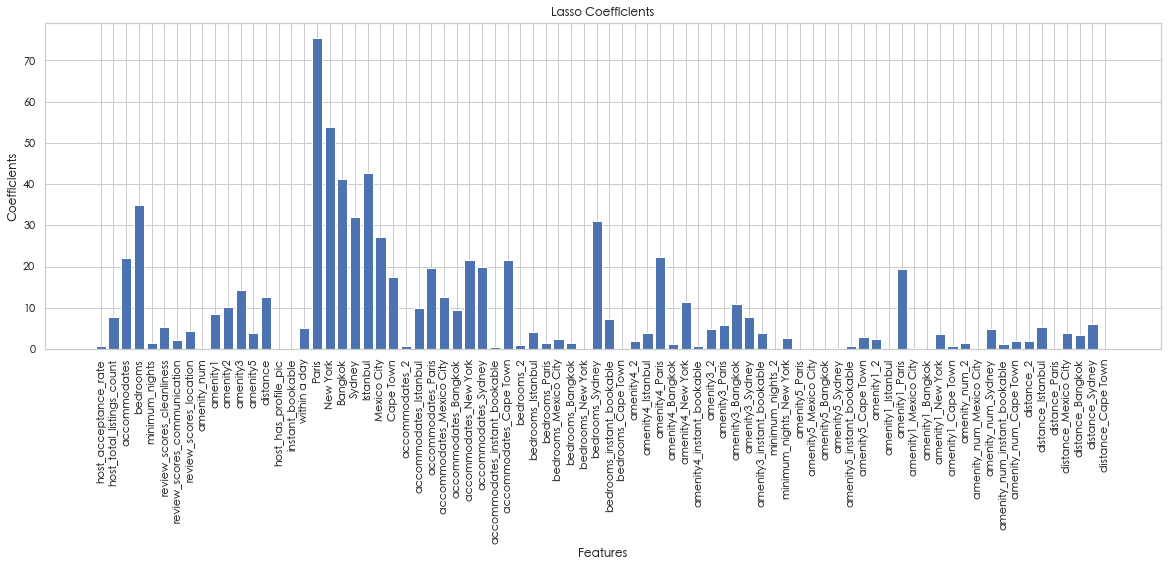

Paris              75.385351
New York           53.965344
Istanbul           42.584838
Bangkok            41.216337
bedrooms           34.943912
Sydney             31.970001
bedrooms_Sydney    31.000226
Mexico City        27.062502
amenity4_Paris     22.226376
accommodates       22.063206
Name: 0, dtype: float64

In [104]:
lasso_coef = abs(lasso2.coef_)

lasso_coef = pd.DataFrame(lasso_coef, index=feature_names)

# 绘制回归系数
plt.figure(figsize=(20, 6))
plt.bar(lasso_coef.index, lasso_coef[0])
plt.title('Lasso Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.xticks(rotation=90)
plt.show()

lasso_coef[0].nlargest(10)

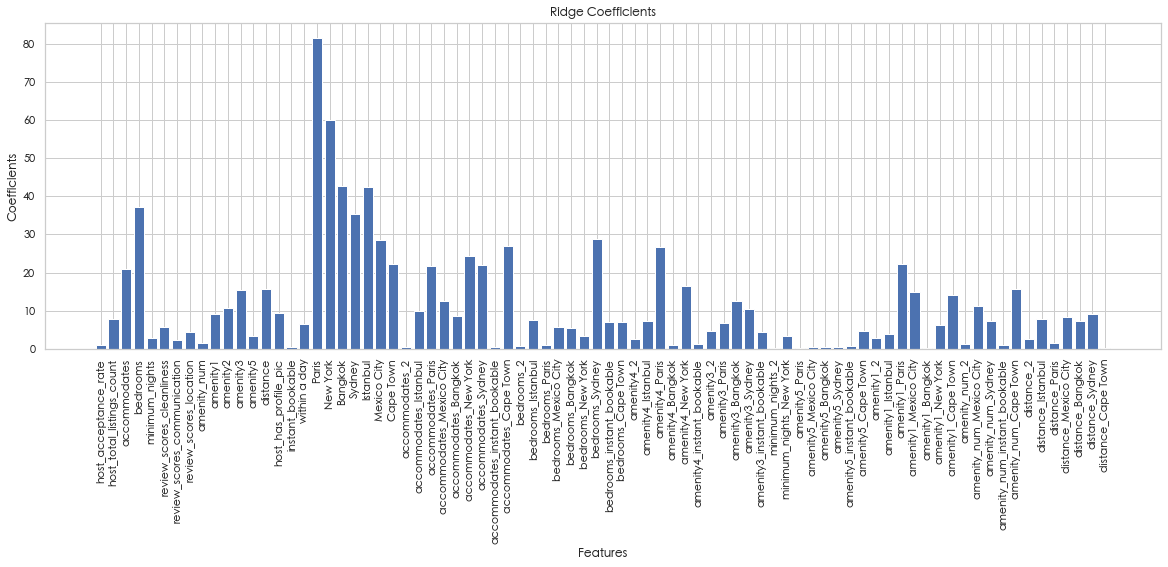

Paris                     81.391317
New York                  59.962436
Bangkok                   42.575326
Istanbul                  42.340992
bedrooms                  37.112842
Sydney                    35.391860
bedrooms_Sydney           28.930173
Mexico City               28.476620
accommodates_Cape Town    26.841837
amenity4_Paris            26.701436
Name: 0, dtype: float64

In [105]:
ridge_coef = abs(ridge2.coef_)

ridge_coef = pd.DataFrame(ridge_coef, index=feature_names)

# 绘制回归系数
plt.figure(figsize=(20, 6))
plt.bar(ridge_coef.index, ridge_coef[0])
plt.title('Ridge Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.xticks(rotation=90)
plt.show()

ridge_coef[0].nlargest(10)

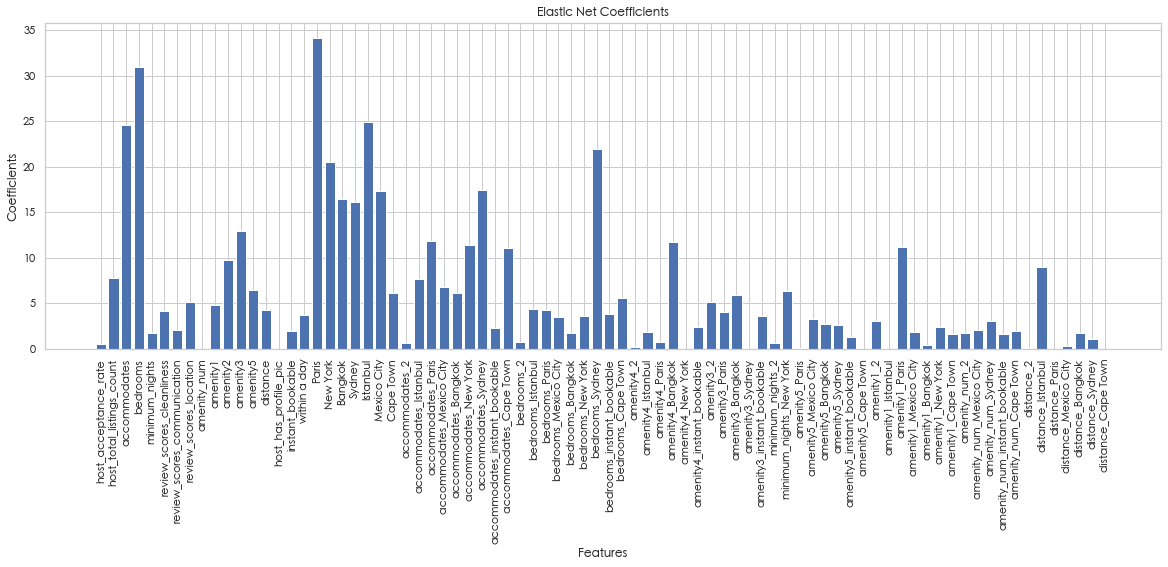

Paris                  34.092918
bedrooms               30.935206
Istanbul               24.898703
accommodates           24.560079
bedrooms_Sydney        21.976116
New York               20.467713
accommodates_Sydney    17.446576
Mexico City            17.348490
Bangkok                16.489738
Sydney                 16.119211
Name: 0, dtype: float64

In [106]:
elastic_net_coef = abs(elastic_net2.coef_)

elastic_net_coef = pd.DataFrame(elastic_net_coef, index=feature_names)

# 绘制回归系数
plt.figure(figsize=(20, 6))
plt.bar(elastic_net_coef.index, elastic_net_coef[0])
plt.title('Elastic Net Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.xticks(rotation=90)
plt.show()

elastic_net_coef[0].nlargest(10)